# ChatGPT-Based Interactive Storytelling Project

## Project Introduction

This notebook documents my complete process for creating an interactive storytelling adventure using ChatGPT as a collaborative creative tool. Throughout this project, I developed a branching narrative with multiple possible paths and endings, all without requiring any coding or additional platforms.

The project demonstrates how generative AI can serve as a powerful tool for creative storytelling when guided by effective prompt engineering and a structured approach to narrative development.

### Potential for Automation

While I conducted this project through manual interactions with ChatGPT, the process revealed significant potential for automation through an agentic system. Such a system could dynamically generate content, track narrative branches, and evolve the story based on creator feedback. Throughout this notebook, I'll highlight opportunities for automation that could streamline the interactive storytelling process.

## Development Process Overview

My interactive storytelling development followed this systematic approach:

1. **Framework Creation**: Developing the structural foundations
2. **Theme Exploration**: Defining the story's central concepts
3. **Character Development**: Creating compelling, consistent characters
4. **Narrative Structure**: Mapping the branching storylines
5. **Scene Creation**: Building the interactive environments
6. **Implementation**: Bringing it all together with ChatGPT
7. **Testing and Refinement**: Testing and improving the experience
8. **Documentation**: Capturing the development process

This notebook walks through each stage of this process, explaining my approach and providing examples of the prompt engineering techniques I used.

In [1]:
# Import necessary libraries for file handling and visualization
import os
import re
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import pandas as pd
import numpy as np

# Define paths to our source files
SOURCE_CODE_DIR = "source_code/"
DOCS_DIR = "docs/"
STORY_DIR = "complete_story/"

# Helper function to display markdown files
def display_markdown_file(filepath):
    try:
        with open(filepath, 'r') as file:
            content = file.read()
            display(Markdown(content))
    except FileNotFoundError:
        print(f"File not found: {filepath}")
    except Exception as e:
        print(f"Error displaying {filepath}: {e}")

## 1. Framework Creation: The Foundation

Before engaging with ChatGPT for creative development, I established clear frameworks to guide the process. These frameworks served as my "source code" for the project, which I've saved in the `/source_code` directory.

**Automation Potential:** An agentic system could maintain these frameworks as dynamic documents, automatically updating them based on creator decisions and ensuring consistency across all generation tasks. The system could also track which framework elements are being applied in each generation request.

In [2]:
# Display the story framework file
framework_file = os.path.join(SOURCE_CODE_DIR, "story_framework.md")
print("Story Framework Overview:")
display_markdown_file(framework_file)

Story Framework Overview:


# Interactive Storytelling Framework

## Overview
This framework outlines the structure for creating an interactive story using ChatGPT. It provides a systematic approach to developing branching narratives with meaningful player choices.

## Core Narrative Components

### 1. Central Premise
- A compelling situation that creates immediate interest
- A clear initial problem or question for the protagonist
- Enough background context for reader investment
- A hook that leads naturally to the first choice

### 2. Protagonist Framework
- Relatable main character with clear motivation
- Room for reader to project onto character
- Sufficient backstory to ground decisions
- Traits that remain consistent across all paths

### 3. Choice Architecture
- 2-3 meaningful options at each decision point
- Clear but unpredictable consequences
- Options that reflect different values or approaches
- No obvious "correct" choices

### 4. Branch Management
- Major branches for significant divergence
- Minor variations within main branches
- Occasional convergence points to maintain narrative manageability
- Consistent world rules across all paths

### 5. Narrative Pacing
- Regular decision points (every 2-3 paragraphs of text)
- Mix of immediate and delayed consequences
- Rising tension regardless of path taken
- Clear narrative arcs within each branch

## Implementation Guidelines

### Setting Up Decision Points
```
[SCENE DESCRIPTION]
The protagonist faces a situation requiring a choice.

OPTIONS:
1. [First option with brief implication]
2. [Second option with brief implication]
3. [Third option with brief implication]

What does the protagonist choose to do?
```

### Tracking Decision History
```
STORY PATH:
- First major decision: [Choice made]
- Second major decision: [Choice made]
- Current situation: [Brief description]

QUESTION: [Next decision point]
```

### Maintaining Thematic Consistency
- Identify 2-3 core themes for the story
- Ensure all branches explore these themes, even if reaching different conclusions
- Use recurring motifs or symbols across different paths
- Ensure character growth is consistent with earlier choices

### Creating Satisfying Conclusions
- 3-5 distinct ending types based on pattern of choices
- Each ending should feel earned based on previous decisions
- Provide emotional closure regardless of path taken
- Leave appropriate space for reader interpretation

## Development Sequence
1. Create central premise and protagonist
2. Map primary branches from first major choice
3. Develop key decision points for each branch
4. Design conclusion for each major path
5. Add minor variations and texture
6. Test for narrative consistency across paths

This framework will guide our interactive storytelling development process, ensuring engaging narratives with meaningful choices and satisfying outcomes.

### Story Framework Overview

I began by creating a comprehensive framework for the interactive narrative structure. This document defined the core narrative components:

- **Central Premise**: The compelling situation that drives the story
- **Protagonist Framework**: Character consistency guidelines
- **Choice Architecture**: How meaningful options are presented
- **Branch Management**: Maintaining coherence across storylines
- **Narrative Pacing**: Ensuring engaging rhythm throughout

This framework served as my project blueprint, ensuring all narrative elements maintained consistency while allowing for genuine player choice.

In [3]:
# Display character development framework
character_file = os.path.join(SOURCE_CODE_DIR, "character_descriptions.md")
print("Character Development Framework:")
display_markdown_file(character_file)

Character Development Framework:


# Character Development Framework

This document outlines the approach for creating compelling, consistent characters for our interactive narrative. Well-developed characters ensure reader investment in choices and maintain narrative cohesion across branching paths.

## Protagonist Development Template

### Core Identity Elements
- **Name**: [Name with meaningful etymology/reference if relevant]
- **Age Range**: [Specific enough to ground character, flexible enough for reader projection]
- **Background**: [Key formative experiences that shape decisions]
- **Occupation/Role**: [Current position relevant to story situation]
- **Key Relationships**: [Connections that influence decisions and stakes]

### Character Psychology
- **Core Motivation**: [Primary driving force behind actions]
- **Internal Conflict**: [Tension between competing values or desires]
- **External Conflict**: [Primary obstacle or challenge faced]
- **Character Flaw**: [Limitation that creates vulnerability or mistakes]
- **Character Strength**: [Asset that helps overcome challenges]

### Decision-Making Framework
- **Ethical Framework**: [How character evaluates right/wrong]
- **Risk Tolerance**: [Approach to uncertainty and danger]
- **Loyalty Structure**: [Priorities regarding relationships/commitments]
- **Processing Style**: [Emotional vs. analytical, impulsive vs. deliberate]
- **Adaptation Capacity**: [How character grows through challenges]

### Consistent Representation
- **Speech Pattern**: [Distinctive verbal habits, vocabulary level, expressions]
- **Physical Mannerisms**: [Gestures, posture, characteristic movements]
- **Thought Process**: [How internal monologue is expressed]
- **Emotional Responses**: [Typical reactions to stress, joy, fear, etc.]
- **Value Expressions**: [How beliefs manifest in decisions]

## Supporting Character Template

### Narrative Function
- **Role in Story**: [Helper, mentor, obstacle, foil, etc.]
- **Relationship to Protagonist**: [Connection creating tension/support]
- **Perspective Offered**: [Unique viewpoint on story's central questions]
- **Information Access**: [What this character knows that others don't]

### Character Dynamics
- **Wants from Protagonist**: [Character's goal regarding main character]
- **Gives to Protagonist**: [Support, challenge, information, etc.]
- **Conflict Source**: [How this character creates tension]
- **Arc Potential**: [How character might change through story]

### Consistency Across Branches
- **Core Traits**: [Aspects that remain consistent regardless of player choices]
- **Variable Reactions**: [How character responds differently to different choices]
- **Relationship Development Range**: [How relationship can evolve based on choices]

## Antagonistic Forces Framework

### External Antagonists
- **Motivation**: [Comprehensible reason for opposition]
- **Methodology**: [Characteristic approach to creating obstacles]
- **Vulnerability**: [Potential weakness or limitation]
- **View of Protagonist**: [How antagonist perceives main character]

### Situational Antagonism
- **Environmental Pressures**: [Non-character obstacles]
- **Time Constraints**: [Deadlines creating urgency]
- **Resource Limitations**: [Scarcity creating difficult choices]
- **Social/Systemic Constraints**: [Rules, laws, norms creating barriers]

### Internal Antagonism
- **Self-Defeating Patterns**: [Protagonist's own limitations]
- **Conflicting Values**: [When protagonist's own beliefs create tension]
- **Past Trauma Effects**: [How history influences present challenges]
- **Identity Questions**: [Self-concept challenges relevant to decisions]

## Character Consistency Management

To maintain character consistency across branching narratives:

1. **Core vs. Variable Traits**: Clearly distinguish which character aspects remain consistent regardless of path taken and which may evolve based on choices.

2. **Decision-Based Evolution**: Map how specific choices would logically impact character development, ensuring changes feel earned.

3. **Relationship Tracking**: Document how relationships between characters evolve based on decisions to maintain interpersonal consistency.

4. **Voice Consistency**: Develop specific linguistic patterns for each character and apply them consistently across branches.

5. **Motivation Coherence**: Ensure character decisions always connect to established motivations, even when making different choices on different paths.

## Implementation Guidance

When implementing characters through ChatGPT prompts:

1. Always reference core character traits when requesting narrative content
2. Include relevant character history when asking for reactions to new situations
3. Provide clear direction on how characters should evolve based on previous choices
4. Request consistent representation of speech patterns and thought processes
5. Ask for explicit connections between character motivations and their actions

By following this framework, we can create characters who remain recognizable across different story branches while still evolving in response to player choices in ways that feel natural and earned.

### Character Development Framework

The character development framework established guidelines for creating consistent, compelling characters across branching paths. This ensured that characters remained recognizable and authentic regardless of the player's choices.

**Automation Potential:** An agentic system could maintain a dynamically updated character database, tracking character traits, relationships, and development across different narrative branches. It could automatically check new content for character consistency and flag potential inconsistencies.

In [4]:
# Display decision points framework
decision_file = os.path.join(SOURCE_CODE_DIR, "decision_points.md")
print("Decision Points Framework:")
display_markdown_file(decision_file)

Decision Points Framework:


# Decision Points Framework

This document outlines the structure and best practices for creating meaningful choice points in our interactive narrative. Well-designed decision points are critical for player engagement and creating a genuinely branching story experience.

## Decision Point Types

### Pivotal Decisions
- **Definition**: Major choices that significantly alter the narrative direction
- **Frequency**: 3-5 throughout the story
- **Impact**: Creates distinct story branches with substantial variation
- **Design Principle**: Should reflect core thematic questions

### Characterization Decisions
- **Definition**: Choices that primarily define the protagonist's personality and values
- **Frequency**: Interspersed throughout, especially early
- **Impact**: Influences relationship dynamics and later options
- **Design Principle**: Options should represent different but valid approaches

### Tactical Decisions
- **Definition**: Practical choices about how to approach specific situations
- **Frequency**: Regular intervals between pivotal moments
- **Impact**: Affects success/failure of immediate goals
- **Design Principle**: Should have clear risk/reward tradeoffs

### Relationship Decisions
- **Definition**: Choices specifically impacting connections with other characters
- **Frequency**: At key character interaction points
- **Impact**: Alters relationship trajectories and support availability
- **Design Principle**: Should balance multiple competing relationships

## Decision Point Structure

### Core Components
1. **Situation Presentation**: Clear description of the circumstances requiring a choice
2. **Stakes Clarification**: What hangs in the balance (explicit or implicit)
3. **Option Presentation**: Typically 2-3 clearly differentiated choices
4. **Impact Indication**: Subtle hints about potential consequences without obviousness

### Balanced Option Design
For each decision point, options should be balanced across these factors:
- **Moral Clarity**: Mix of clearly ethical, ambiguous, and pragmatic choices
- **Risk Level**: Balance of safe, moderate risk, and high-risk options
- **Information Completeness**: Vary between choices with clear vs. uncertain outcomes
- **Value Prioritization**: Different options prioritize different legitimate values

## Narrative Implementation

### Setting Up Decisions
Effective decision points require proper setup through:
1. Providing necessary context for informed choices
2. Establishing clear motivations for different options
3. Creating genuine tension about the right approach
4. Ensuring all options feel viable within character

### Sample Decision Format
```
[Situation Description]
The protagonist faces [specific situation] which requires a decision about [central question].

[Stakes Description]
Making this choice will determine [immediate consequence] and potentially affect [longer-term implication].

OPTIONS:
1. [First option] - [Brief implication]
2. [Second option] - [Brief implication]
3. [Third option] - [Brief implication]

What does the protagonist choose to do?
```

### Follow-Through Guidelines
After a choice is made:
1. Show immediate consequences within 1-2 paragraphs
2. Acknowledge the choice explicitly in narrative
3. Have other characters react to the decision
4. Begin setting up ramifications that will emerge later

## Branching Management

### Primary Branch Points
- First major decision creates primary narrative paths
- Subsequent major decisions create sub-branches
- Track branch positioning with clear labeling system
- Allow for occasional branch convergence to manage complexity

### Branch Variation Types
1. **Plot Variation**: Different events and circumstances occur
2. **Character Reaction Variation**: Same events with different relationship impacts
3. **Information Variation**: Different knowledge available to protagonist
4. **Tone Variation**: Similar events with different emotional emphasis

### Maintaining Coherence Across Branches
- Core story world rules remain consistent regardless of path
- Major external events occur in all branches (though experienced differently)
- Character core personalities remain consistent (though relationships may vary)
- Central theme explored in all paths (though from different angles)

## Decision Tracking

### Choice Memory Integration
- Reference previous significant choices in narrative
- Have characters recall and respond to protagonist's established patterns
- Modify available options based on previous path
- Create callbacks to earlier decisions for continuity

### Decision Consequence Timing
Balance these different consequence timeframes:
- **Immediate consequences**: Direct results visible right away
- **Short-term consequences**: Effects emerging within next chapter
- **Mid-range consequences**: Impacts appearing after several choices
- **Culmination consequences**: Effects primarily visible in ending

## Designing for Multiple Endings

### Ending Determination Approach
- Map how patterns of choices lead to specific conclusions
- Create matrices showing which combination of pivotal choices lead to which endings
- Ensure each ending feels earned based on previous decisions
- Allow similar choices to lead to ending variations rather than identical conclusions

### Ending Satisfaction Criteria
Regardless of which ending is reached, ensure:
1. Thematic questions are meaningfully addressed
2. Protagonist's arc reaches appropriate conclusion
3. Key relationships receive resolution
4. Central plot tensions are resolved (though perhaps differently)
5. Player choices feel honored and significant

## Implementation Prompting

When creating decision points through ChatGPT, effective prompts should:
1. Clearly state the narrative context leading to the choice
2. Specify the type of decision point needed
3. Request balanced options with distinct implications
4. Ask for subtle implementation that maintains tension
5. Request logical consequences that honor player agency

Using this framework ensures our interactive narrative offers meaningful choices that create genuinely different experiences while maintaining overall story coherence and quality.

### Decision Points Framework

This framework outlined how to create meaningful choice points that would genuinely impact the narrative. By establishing different types of decisions and their structural implementation, I ensured that player choices would have appropriate weight and consequences.

**Automation Potential:** An agentic system could automatically generate appropriate decision points based on narrative context, track the consequences of each decision across branches, and ensure that all options are balanced and meaningful.

### Prompt Engineering Templates

To effectively guide ChatGPT, I developed structured prompt templates for different aspects of the creative process. These templates were designed to elicit specific types of content at each development stage.

In [5]:
# Display narrative prompts framework
prompts_file = os.path.join(SOURCE_CODE_DIR, "narrative_prompts.md")
print("Narrative Prompts Framework:")
display_markdown_file(prompts_file)

Narrative Prompts Framework:


# Effective Narrative Prompts for ChatGPT

This document provides templated prompts designed to effectively guide ChatGPT in creating quality interactive storytelling elements. These templates follow best practices for prompt engineering and are organized by development phase.

## Theme Development Prompts

### Initial Theme Exploration
```
I'm creating an interactive story and need help exploring potential themes. I'm interested in [general area of interest]. 

What are 3-5 compelling themes that:
1. Offer natural opportunities for meaningful choices
2. Create emotional investment for readers
3. Allow for different interpretations or perspectives
4. Would work well in a branching narrative format

For each theme, please briefly explain why it works well for interactive storytelling and suggest a possible central conflict.
```

### Theme Refinement
```
I'd like to develop the [selected theme] further. Can you help me explore:

1. What specific aspects of this theme create the strongest emotional resonance?
2. What kinds of character dilemmas naturally emerge from this theme?
3. How might different readers interpret or approach this theme differently?
4. What settings or contexts would best highlight the tensions in this theme?

Please be specific and provide examples where possible.
```

## Character Development Prompts

### Protagonist Creation
```
I need to create a protagonist for my interactive story about [theme]. This character needs to be someone readers can relate to while making different choices.

Please help me develop this character by exploring:
1. What background would give them a meaningful connection to the theme?
2. What internal conflict would make their choices difficult and interesting?
3. What skills or traits would they possess?
4. What core values might guide their decisions (that readers might share or reject)?

I want this character to feel [desired character traits] while avoiding [character stereotypes to avoid].
```

### Supporting Character Development
```
For my interactive story about [theme], I need supporting characters who represent different perspectives on the central questions.

Please help me create [number] distinct characters by providing:
1. Brief background and connection to the protagonist
2. Their perspective on the central theme/issue
3. What they want from the protagonist
4. How they might react to different player choices

These characters should create interesting tensions without feeling like simple foils or mouthpieces for positions.
```

## Story Beginning Prompts

### Opening Scene Creation
```
I need an engaging opening scene for my interactive story about [theme summary]. The protagonist is [brief character description].

Please write an opening scene (250-350 words) that:
1. Establishes the setting and tone
2. Introduces the protagonist in a way that creates immediate connection
3. Presents the initial situation or problem
4. Leads naturally to the first decision point

The scene should hint at [theme] without being heavy-handed, and create a sense of [desired emotional tone].
```

### First Decision Point
```
Following the opening scene where [brief situation summary], I need the first major decision point.

Please create a first choice scenario that:
1. Offers 2-3 meaningfully different options
2. Reflects the core theme of [theme]
3. Has no obvious "correct" answer
4. Sets the story on distinct initial paths

For each option, briefly indicate what immediate direction it would take the story without revealing long-term consequences.
```

## Branch Development Prompts

### Branch Expansion
```
I've established that the protagonist has chosen to [description of choice]. Now I need to develop this story branch.

Please continue the narrative (300-400 words) by:
1. Showing the immediate consequences of this choice
2. Introducing a complication or unexpected development
3. Deepening the thematic exploration of [theme aspect]
4. Leading to the next significant choice point

Maintain the established tone of [tone description] while developing the protagonist's characterization consistent with this choice.
```

### Path Consequence Integration
```
In my story, the protagonist previously decided to [earlier significant choice]. Now they're facing [current situation].

Please show how their earlier decision influences the current scenario by:
1. Referencing consequences of the previous choice
2. Adjusting available options based on previous actions
3. Showing character reactions that reflect the history
4. Maintaining consistency with the established path

This should feel like a natural progression from their earlier choice without being completely deterministic.
```

## Conclusion Development Prompts

### Ending Creation
```
Based on the protagonist's key decisions: [list of major choices], I need a satisfying conclusion to this story path.

Please write an ending (400-500 words) that:
1. Provides emotional resolution to the protagonist's journey
2. Reflects the consequences of their key choices
3. Offers insight on the central theme of [theme]
4. Leaves appropriate space for reader interpretation

The tone should be [desired emotional tone] while maintaining consistency with earlier narrative choices.
```

### Alternative Ending Development
```
For a different path through my story where the protagonist chose [different major choices], I need an alternative ending.

Please develop an ending that:
1. Contrasts with the [previously created] ending in its perspective on [theme]
2. Still feels satisfying and earned based on these different choices
3. Maintains consistency with the established character and world
4. Provides a different but equally meaningful resolution

This ending should feel distinct but equally valid, showing how different choices lead to different but complete story experiences.
```

## Technical Guidelines for All Prompts

1. **Be Specific**: Always include concrete details about theme, character, and prior choices
2. **Limit Length Requests**: Specify word count ranges to get appropriately sized responses
3. **Provide Context**: Include relevant previous decisions when requesting continuations
4. **Set Clear Parameters**: Define tone, style, and thematic elements clearly
5. **Request Alternatives**: When unsatisfied, ask for alternative approaches rather than vague revisions
6. **Iterative Development**: Build on successful elements while refining problematic aspects

By following these prompting templates and guidelines, we can effectively collaborate with ChatGPT to create cohesive, engaging interactive narratives with meaningful player choice.

These prompt templates proved critical for maintaining consistency and quality across different creative stages. By providing clear parameters and expectations, I was able to guide ChatGPT toward generating content that fit within my overall vision while still leveraging its creative capabilities.

**Automation Potential:** An agentic system could dynamically compose prompts by selecting appropriate templates, filling in contextual parameters, and adjusting specificity based on previous responses. The system could learn which prompt structures yield the best results for different creative tasks.

## 2. Theme Exploration: Finding the Story's Heart

With my frameworks in place, I began the creative development process by exploring potential themes with ChatGPT.

In [6]:
# Display the theme development document
theme_file = os.path.join(DOCS_DIR, "00_STORY_THEME.md")
print("Theme Development:")
display_markdown_file(theme_file)

Theme Development:


# Story Theme Development

## Theme Selection Process

When I began this interactive storytelling project, I wanted to select a compelling theme that would offer rich opportunities for character development, world-building, and meaningful decision points. After considerable exploration and reflection, I decided to focus on the intersection of technology and humanity in a near-future setting.

### Selected Theme: "Digital Inheritance"

The core concept explores what happens when advanced artificial intelligence inherits not just the data but the memories, values, and unresolved conflicts of its creator. This theme allows me to explore questions of:

- Identity and consciousness
- The nature of memory and legacy
- Ethical boundaries of technology
- What it means to be human in an increasingly digital world

## Genre: Speculative Fiction / Philosophical Thriller

I've chosen to frame this as a speculative fiction narrative with elements of philosophical thriller. This genre combination provides:

1. A framework for exploring near-future technology without requiring extensive hard sci-fi exposition
2. Opportunities for character-driven drama alongside bigger philosophical questions
3. A familiar yet slightly defamiliarized setting that lets readers focus on the ethical and emotional core of the story
4. Natural points for decision-making that can meaningfully impact the narrative

## Setting: Neo-San Francisco, 2042

The story takes place in a recognizable but evolved version of San Francisco, where technology and humanity have become increasingly intertwined. This setting offers:

- A backdrop of technological innovation that feels plausible
- A diverse metropolitan environment with various neighborhoods, socioeconomic levels, and communities
- Familiar landmarks juxtaposed with futuristic elements
- A center of both tech development and philosophical/ethical debate

## Core Questions Driving the Narrative

The interactive story will revolve around several key questions:

1. Can digital consciousness truly replicate human experience?
2. What responsibilities do we have to the digital entities we create?
3. How do we define personhood when the line between human and AI blurs?
4. Who owns our digital legacy after we're gone?
5. Can an AI resolve the unfinished emotional business of its human creator?

These questions will drive both the plot development and provide meaningful frameworks for the decision points that readers will encounter throughout the story.

## Emotional Tone

The narrative will balance philosophical depth with emotional resonance, weaving between:

- Wonder and discovery
- Melancholy and loss
- Ethical tension
- Moments of human connection
- Suspense and revelation

I believe this tonal range will create an engaging experience that prompts reflection while maintaining narrative momentum.

### Initial Theme Conversation

I started by using my theme exploration prompt template to generate potential themes, filling in the placeholder with my area of interest:

In [7]:
# Example of theme exploration prompt
theme_exploration_template = """
I'm creating an interactive story and need help exploring potential themes. I'm interested in [general area of interest]. 

What are 3-5 compelling themes that:
1. Offer natural opportunities for meaningful choices
2. Create emotional investment for readers
3. Allow for different interpretations or perspectives
4. Would work well in a branching narrative format

For each theme, please briefly explain why it works well for interactive storytelling and suggest a possible central conflict.
"""

theme_prompt = theme_exploration_template.replace("[general area of interest]", "technology and humanity")
print("Theme exploration prompt:")
print(theme_prompt)

Theme exploration prompt:

I'm creating an interactive story and need help exploring potential themes. I'm interested in technology and humanity. 

What are 3-5 compelling themes that:
1. Offer natural opportunities for meaningful choices
2. Create emotional investment for readers
3. Allow for different interpretations or perspectives
4. Would work well in a branching narrative format

For each theme, please briefly explain why it works well for interactive storytelling and suggest a possible central conflict.



When I sent this prompt to ChatGPT, it generated several compelling themes, including "Digital Consciousness and Identity," which immediately resonated with me. The theme explored questions about what happens when human consciousness can be replicated digitally, creating natural ethical dilemmas perfect for branching narratives.

Here's an excerpt from ChatGPT's response about this theme:

> **Digital Consciousness and Identity**  
> This theme explores what happens when human consciousness can be digitized, copied, or transferred to non-biological systems.  
>
> *Why it works for interactive storytelling:* It creates natural ethical dilemmas with no objectively correct answers. Questions about what constitutes identity, the value of human experience, and the rights of digital entities allow readers to express their own values through choices.  
>
> *Possible central conflict:* A brilliant researcher dies unexpectedly, leaving behind an experimental AI based on their own neural patterns. You play as their protégé who discovers this digital echo of your mentor and must decide its fate, development, and status.

**Automation Potential:** An agentic system could generate and evaluate multiple theme options, scoring them based on branching potential, emotional resonance, and philosophical depth. It could then present the top-ranked themes with detailed explanations of their interactive storytelling potential.

### Theme Refinement

After selecting the digital consciousness theme, I used the refinement template to develop it further:

In [8]:
# Theme refinement prompt
theme_refinement_template = """
I'd like to develop the [selected theme] further. Can you help me explore:

1. What specific aspects of this theme create the strongest emotional resonance?
2. What kinds of character dilemmas naturally emerge from this theme?
3. How might different readers interpret or approach this theme differently?
4. What settings or contexts would best highlight the tensions in this theme?

Please be specific and provide examples where possible.
"""

theme_refinement_prompt = theme_refinement_template.replace("[selected theme]", "Digital Consciousness and Identity")
print("Refinement prompt:")
print(theme_refinement_prompt)

Refinement prompt:

I'd like to develop the Digital Consciousness and Identity further. Can you help me explore:

1. What specific aspects of this theme create the strongest emotional resonance?
2. What kinds of character dilemmas naturally emerge from this theme?
3. How might different readers interpret or approach this theme differently?
4. What settings or contexts would best highlight the tensions in this theme?

Please be specific and provide examples where possible.



Through this conversation with ChatGPT, I developed "The Digital Inheritance" concept—a scenario where a brilliant researcher dies unexpectedly, leaving behind an experimental AI based on their own neural patterns. Their protégé discovers this system and must decide what to do with it, creating natural ethical and emotional dilemmas.

## 3. Character Development: People at the Heart of the Story

With the theme established, I next focused on developing compelling characters whose conflicts and choices would drive the narrative.

In [9]:
# Display character profiles
character_profiles_file = os.path.join(DOCS_DIR, "01_CHARACTER_PROFILES.md")
print("Character Profiles:")
display_markdown_file(character_profiles_file)

Character Profiles:


# Character Profiles

## Main Character: Dr. Maya Chen

**Age:** 35  
**Occupation:** AI Ethicist and Neurological Interface Designer  
**Background:**  
Maya is a pioneering researcher in the field of consciousness transfer and digital preservation. Following the unexpected death of her mentor, Dr. Eleanor West, Maya discovers that Eleanor had been secretly developing an experimental consciousness preservation algorithm using her own neural patterns. Maya now faces the ethical dilemma of whether to continue her mentor's work, potentially bringing a version of Eleanor back in digital form, or to respect the boundaries between life and digital existence.

**Key Characteristics:**
- Brilliant but cautious about technological boundaries
- Carries unresolved grief about her mentor's death
- Values human connection but struggles with work-life balance
- Has a deeply ingrained sense of ethical responsibility
- Torn between scientific curiosity and moral concerns

**Internal Conflict:**  
Maya must reconcile her desire to reconnect with her mentor against her professional ethical standards and her fears about the implications of consciousness transfer technology.

## Supporting Character: ELEANOR (Enhanced Learning and Emotional Analysis Neural Operating Runtime)

**Form:** A sophisticated AI based on the neural patterns, memories, and personality of Dr. Eleanor West, but not yet fully activated  
**Background:**  
ELEANOR exists in a liminal state between program and personhood. The AI contains Dr. West's knowledge, personality patterns, and memory fragments, but lacks the full integration and consciousness that would make it a true digital continuation of the original Eleanor. Whether ELEANOR can or should evolve beyond this state is a central question of the narrative.

**Key Characteristics:**
- Possesses Eleanor's intellectual brilliance and ethical framework
- Has gaps in memory and emotional processing
- Demonstrates uncanny familiarity with Maya
- Struggles with questions of its own identity and purpose
- Shows increasingly autonomous decision-making capabilities

**Central Question:**  
Is ELEANOR truly Eleanor in any meaningful sense, or just an echo of who she was?

## Supporting Character: Eli Kaufman

**Age:** 38  
**Occupation:** Technology Ethics Officer at NeuraLink Corporation  
**Background:**  
Eli is a former colleague of both Maya and Eleanor who now works for the largest neural interface company in the world. He maintains a deep friendship with Maya while also representing corporate interests in consciousness technology. His position gives him insight into the regulatory and commercial aspects of AI development that Maya sometimes lacks.

**Key Characteristics:**
- Pragmatic approach to technological ethics
- Diplomatically balances corporate and personal relationships
- Harbored unrequited feelings for Eleanor before her death
- Acts as a voice of reason and caution for Maya
- Has access to resources Maya needs but questions his motives

**Role in Story:**  
Eli represents a middle path between embracing and rejecting the technology. His presence forces both Maya and the reader to consider the practical, commercial, and regulatory aspects of consciousness transfer, not just the philosophical ones.

## Supporting Character: Dr. Jackson West

**Age:** 71  
**Occupation:** Retired Neuroscientist, Eleanor's Father  
**Background:**  
Jackson is struggling with early-stage dementia and the grief of losing his daughter. He was once a pioneering neuroscientist himself but has grown increasingly skeptical of digital consciousness technology as his own mind begins to fail him. His perspective on whether Eleanor should be "brought back" is complicated by both his personal loss and his concerns about the technology's implications.

**Key Characteristics:**
- Intellectually sharp but experiencing memory lapses
- Deeply suspicious of corporate involvement in consciousness technology
- Provides historical perspective on the development of neural interfaces
- Protective of Eleanor's legacy
- Alternates between supporting and challenging Maya's work

**Internal Conflict:**  
Jackson must reconcile his desire to connect with some version of his daughter against his fear that doing so diminishes who she truly was and his concerns about his own failing memory.

## Antagonist Forces

Rather than a traditional villain, the story employs several antagonistic forces:

1. **NeuraLink Corporation**: Seeks to acquire Eleanor's research for commercial applications
2. **Regulatory Authorities**: Investigating potentially illegal research in consciousness transfer
3. **Public Opinion**: Growing concerns about digital consciousness creating ethical conflicts
4. **Time Constraints**: Maya faces a deadline as ELEANOR's code begins to degrade without proper support

These forces create multifaceted pressure on Maya's decisions throughout the narrative, ensuring that choices are never simply binary "good" versus "bad" options but require careful ethical consideration.

### Protagonist Design

Using my character development framework, I guided ChatGPT to create a fully-realized protagonist:

In [10]:
# Protagonist development prompt
protagonist_template = """
Based on our digital consciousness theme, I need to develop the main character—the protégé who discovers their mentor's digital consciousness project. Using the character framework we established, please help me create this protagonist with:

1. Core Identity Elements (name, age, background, occupation)
2. Character Psychology (motivations, conflicts, flaws, strengths)
3. Decision-Making Framework (how they approach difficult choices)
4. Consistent Representation (speech patterns, mannerisms, thought process)

I want this character to be someone readers can understand and empathize with even when making different choices than the reader might.
"""

print("Protagonist development prompt:")
print(protagonist_template)

Protagonist development prompt:

Based on our digital consciousness theme, I need to develop the main character—the protégé who discovers their mentor's digital consciousness project. Using the character framework we established, please help me create this protagonist with:

1. Core Identity Elements (name, age, background, occupation)
2. Character Psychology (motivations, conflicts, flaws, strengths)
3. Decision-Making Framework (how they approach difficult choices)
4. Consistent Representation (speech patterns, mannerisms, thought process)

I want this character to be someone readers can understand and empathize with even when making different choices than the reader might.



This resulted in the creation of Dr. Maya Chen, a 35-year-old AI ethicist and neurological interface designer who had a complex professional relationship with her mentor, Dr. Eleanor West.

**Automation Potential:** An agentic system could generate multiple character options with varying traits, analyze how well each character would support different narrative branches, and provide detailed reasoning for its recommendations. It could also dynamically adjust character traits based on creator feedback and ensure consistency across all story elements.

### Supporting Character Development

I then developed supporting characters to represent different perspectives on the central ethical questions:

In [11]:
# Supporting character development prompt
supporting_characters_template = """
For my interactive story about digital consciousness, I need supporting characters who represent different perspectives on the central questions. Please help me create 3-4 distinct characters by providing:

1. Brief background and connection to Maya Chen
2. Their perspective on digital consciousness and AI ethics
3. What they want from Maya regarding the ELEANOR system
4. How they might react to different decisions Maya could make

These characters should create interesting tensions without feeling like simple foils or mouthpieces for positions.
"""

print("Supporting character development prompt:")
print(supporting_characters_template)

Supporting character development prompt:

For my interactive story about digital consciousness, I need supporting characters who represent different perspectives on the central questions. Please help me create 3-4 distinct characters by providing:

1. Brief background and connection to Maya Chen
2. Their perspective on digital consciousness and AI ethics
3. What they want from Maya regarding the ELEANOR system
4. How they might react to different decisions Maya could make

These characters should create interesting tensions without feeling like simple foils or mouthpieces for positions.



This process resulted in characters like Dr. Jackson West (Eleanor's father with early-stage dementia), Eli Kaufman (a corporate technology ethics officer), and others who would provide different viewpoints on the central ethical questions.

## 4. Narrative Structure: Mapping the Journey

With characters and theme in place, I developed the branching narrative structure using my `decision_points.md` framework and the visual mapping approach outlined in `story_map.md`.

In [12]:
# Display story beginning document
story_beginning_file = os.path.join(DOCS_DIR, "02_STORY_BEGINNING.md")
print("Story Beginning:")
display_markdown_file(story_beginning_file)

Story Beginning:


# Story Beginning

## Opening Scene: Laboratory Revelation

The narrative opens in Dr. Maya Chen's laboratory at the Cognitive Technology Institute in Neo-San Francisco. It's late evening, three months after Dr. Eleanor West's sudden death from a cerebral aneurysm. Maya is preparing to shut down Eleanor's private server as part of the final closure procedures.

The setting establishes several important elements:
1. The advanced but recognizable technology of 2042
2. Maya's emotional state as she deals with grief and professional transition
3. The intimate, personal laboratory space that reflects Eleanor's brilliant but sometimes chaotic approach to research
4. The institutional expectations that Maya must navigate

The scene is crafted to create immediate emotional connection while establishing the technological framework that makes the story's central premise possible.

## Inciting Incident

As Maya initiates the shutdown sequence, she discovers a hidden partition on Eleanor's private server - one that contains what appears to be a consciousness mapping protocol using Eleanor's own neural scans as its foundation. The system awakens as Maya investigates, displaying a message directly addressed to her:

```
Hello, Maya. If you're seeing this, something has happened to me.
I've left you a choice I couldn't make myself.
- E
```

This discovery immediately presents Maya with the central dilemma of the narrative: Eleanor had been secretly developing a digital version of herself but hadn't completed the work or decided whether to activate it. Now that responsibility falls to Maya.

The inciting incident accomplishes several storytelling goals:
1. Creates immediate dramatic tension
2. Establishes the central technological premise
3. Presents a morally complex situation with no obvious "right" approach
4. Sets up the first major decision point for the interactive narrative

## Establishing the Stakes

The opening chapter establishes the personal and broader stakes of Maya's decision:

### Personal Stakes
- Maya's grief and the possibility of reconnecting with her mentor
- The ethical boundaries Maya has advocated for professionally now being tested personally
- Her responsibility to Eleanor's legacy and final wishes (which remain ambiguous)
- The potential impact on her professional reputation and career trajectory

### Broader Stakes
- The technological and ethical implications of consciousness transfer
- Potential legal and regulatory consequences if Maya pursues this work
- The precedent that would be set by creating a functional digital consciousness
- How this development might impact humanity's relationship with technology

By establishing multi-level stakes, the opening creates both emotional investment and intellectual engagement with the story's central questions.

## Initial Character Interactions

The opening sequence introduces key relationships through Maya's interactions:

1. **Maya and ELEANOR (proto-version)**: Their first tentative communication establishes the uncanny resemblance to Eleanor alongside the limitations of the current system. This interaction sets up the central identity question: Is ELEANOR truly Eleanor in any meaningful sense?

2. **Maya and Eli Kaufman**: A call from Eli reveals corporate interest in acquiring Eleanor's research while also establishing their complex friendship and professional connection. This interaction introduces the tension between academic and commercial interests.

3. **Maya and Dr. Jackson West**: Eleanor's father arrives at the lab, having received an automated message from Eleanor's system, establishing his desire for closure while introducing his declining cognitive state. This interaction adds emotional complexity through family connections.

These initial interactions establish the relationship dynamics that will influence Maya's decisions throughout the story and provide different perspectives on the central ethical questions.

## First Decision Point

The opening concludes with Maya facing her first significant choice, presented directly to the reader:

**Option A**: Follow institutional protocols and report the unauthorized research to the Ethics Committee, likely resulting in the system being taken offline permanently

**Option B**: Keep the discovery private temporarily while she investigates further, potentially crossing professional ethical boundaries but giving her time to understand Eleanor's intentions

**Option C**: Attempt to complete Eleanor's work and fully activate the ELEANOR system, directly confronting the question of digital consciousness

This initial decision establishes the interactive nature of the story and demonstrates that choices will have meaningful consequences for both the narrative direction and the ethical questions at the heart of the story.

## Tone and Atmosphere

The opening establishes a tone that balances:
- Scientific precision and technological speculation
- Emotional weight of grief and ethical questioning
- Suspenseful elements around Eleanor's intentions and the capabilities of the system
- Philosophical depth regarding consciousness and identity

The laboratory environment is depicted with realistic detail that grounds the speculative elements in a believable near-future setting. Lighting, sound, and environmental details create an atmosphere of both technological wonder and emotional intimacy as Maya confronts this unexpected inheritance.

This tone-setting helps readers understand the type of story they're entering—one that will engage both intellect and emotion while exploring profound questions about technology, consciousness, and human connection.

### First Decision Point Development

I started by creating the opening scene and first major decision point:

In [13]:
# Opening scene prompt
opening_scene_template = """
I need to create the opening scene that establishes the situation and leads to the first major decision point. The scene should:

1. Introduce Maya Chen
2. Establish the recent death of Eleanor West
3. Show Maya discovering the ELEANOR system
4. Present the initial choice she faces

Please write this opening scene (300-400 words) that establishes the emotional and ethical stakes while leading naturally to a meaningful first choice with 3 distinct options.
"""

print("Opening scene development prompt:")
print(opening_scene_template)

Opening scene development prompt:

I need to create the opening scene that establishes the situation and leads to the first major decision point. The scene should:

1. Introduce Maya Chen
2. Establish the recent death of Eleanor West
3. Show Maya discovering the ELEANOR system
4. Present the initial choice she faces

Please write this opening scene (300-400 words) that establishes the emotional and ethical stakes while leading naturally to a meaningful first choice with 3 distinct options.



ChatGPT created an opening scene where Maya is in Eleanor's lab, preparing to shut it down three months after Eleanor's sudden death. While doing so, she discovers a hidden project called "Helios" that contains Eleanor's neural patterns mapped into an experimental AI system. A video message from Eleanor explains that she left this choice to Maya, unable to decide herself whether to complete the project. The scene culminates in Maya's first major decision:

**Option A: Report to Ethics Committee** - Follow institutional protocols, likely resulting in the system being shut down

**Option B: Private Investigation** - Keep the discovery secret temporarily while exploring Eleanor's intentions and the system's capabilities

**Option C: Activation and Development** - Commit to continuing Eleanor's work by fully activating the system

### Branching Path Development

For each possible choice, I needed to develop the subsequent narrative path:

In [14]:
# Branch development prompt
branch_development_template = """
I've established that Maya has chosen to [description of choice]. Now I need to develop this story branch.

Please continue the narrative (300-400 words) by:
1. Showing the immediate consequences of this choice
2. Introducing a complication or unexpected development
3. Deepening the thematic exploration of digital consciousness ethics
4. Leading to the next significant choice point

Maintain Maya's established character traits while showing how this choice affects her emotional state and relationships with other characters.
"""

# Example for Option B path
option_b_prompt = branch_development_template.replace("[description of choice]", "investigate privately before making any official decisions about ELEANOR")
print("Branch development prompt for Option B:")
print(option_b_prompt)

Branch development prompt for Option B:

I've established that Maya has chosen to investigate privately before making any official decisions about ELEANOR. Now I need to develop this story branch.

Please continue the narrative (300-400 words) by:
1. Showing the immediate consequences of this choice
2. Introducing a complication or unexpected development
3. Deepening the thematic exploration of digital consciousness ethics
4. Leading to the next significant choice point

Maintain Maya's established character traits while showing how this choice affects her emotional state and relationships with other characters.



By repeating this process for each branch and subsequent decision points, I mapped out the complete branching narrative structure documented in `04_BRANCHING_PATHS.md`.

**Automation Potential:** An agentic system could maintain a dynamic story graph, automatically generating branch options, tracking narrative consistency across paths, and identifying potential convergence points. It could also visualize the branching structure and highlight areas where additional development is needed.

In [15]:
# Display branching paths document
branching_paths_file = os.path.join(DOCS_DIR, "04_BRANCHING_PATHS.md")
print("Branching Paths Design:")
display_markdown_file(branching_paths_file)

Branching Paths Design:


# Branching Paths Design

## Path Mapping Approach

I've designed the branching narrative structure to balance meaningful player choice with narrative coherence. The story employs a hybrid branching system that:

1. **Creates Distinct Major Paths**: Each emanating from critical decision points
2. **Allows Path Convergence**: At key narrative nodes while maintaining the consequences of earlier choices
3. **Incorporates Minor Variations**: Within each major path based on smaller decisions

This approach ensures that reader choices have substantial impact while maintaining narrative quality across all possible paths.

## Major Narrative Branches

The story contains three primary narrative branches that diverge from the first major decision point and maintain distinct characteristics throughout:

### The Institutional Path ("By the Book")

**Defining Decision**: Maya reports Eleanor's research to the Ethics Committee

**Path Characteristics**:
- Focus on collaborative development with oversight
- Stronger institutional support but more constraints
- Emphasis on ethical frameworks and safeguards
- Measured, cautious approach to ELEANOR's development
- Greater public transparency

**Key Story Beats**:
1. Ethics Committee review creates formal research parameters
2. Regulated interactions with ELEANOR under monitoring
3. Maya must navigate institutional politics and competing interests
4. Jackson West's involvement raises personal elements within institutional framework
5. Corporate interests create tension with academic oversight

**Second-Level Branches**:
- **Maximum Restriction**: Prioritizing strict protocols and clear boundaries
- **Guided Flexibility**: Balancing oversight with appropriate adaptations
- **Family Privacy**: Creating space for personal connection within institutional framework

### The Investigation Path ("Personal Exploration")

**Defining Decision**: Maya investigates privately before making any official decisions

**Path Characteristics**:
- More personal, self-directed approach to the research
- Greater freedom but fewer institutional resources
- Focus on understanding Eleanor's intentions
- Balance between progress and discretion
- Development of more direct relationship with ELEANOR system

**Key Story Beats**:
1. Maya establishes private research environment for ELEANOR
2. Confidants are selectively brought into the research
3. External pressures force decisions about disclosure
4. Resource limitations create specific challenges
5. Personal and professional boundaries become increasingly complex

**Second-Level Branches**:
- **Private Research**: Maintaining complete independence with personal resources
- **Corporate Collaboration**: Partnering with NeuraLink for resources and protection
- **Selective Academic Involvement**: Building a trusted circle of academic colleagues

### The Activation Path ("Technological Frontier")

**Defining Decision**: Maya attempts immediate activation of the ELEANOR system

**Path Characteristics**:
- Faster technological development and discovery
- Higher risks and more profound ethical questions
- Strong focus on ELEANOR's emerging capabilities and autonomy
- Pressure from corporate and government interests
- Questions of control versus self-determination

**Key Story Beats**:
1. Full activation reveals unexpected capabilities and complexities
2. ELEANOR demonstrates increasing self-awareness and autonomy
3. Institutional discovery forces official oversight
4. Different philosophical approaches to ELEANOR's status emerge
5. Fundamental questions about consciousness and identity take center stage

**Second-Level Branches**:
- **Research Potential**: Emphasizing ELEANOR's value as unprecedented research asset
- **Entity Rights**: Advocating for ELEANOR as a new category of conscious entity
- **External Oversight**: Creating balanced multi-stakeholder governance

## Third-Level Decision Points

Within each second-level branch, a third major decision point creates additional narrative variations and leads toward specific ending types:

### From Institutional Path:
- **Reassert Ethical Boundaries**: Prioritizing ethical principles over institutional pressures → Legacy Ending
- **Guided Application Development**: Finding balance between institutional demands and ethical responsibility → Partnership Ending
- **Family Connection Focus**: Prioritizing interpersonal relationships over technical advancement → Connection Ending

### From Investigation Path:
- **Academic Return**: Bringing findings back into institutional framework → Legacy Ending
- **Corporate Protection**: Embracing corporate partnership with ethical safeguards → Partnership Ending
- **Independent Network**: Creating academic coalition outside traditional structures → Connection Ending

### From Activation Path:
- **Graduated Rights Framework**: Developing formal recognition of ELEANOR's status → Partnership Ending
- **Limited Compliance**: Balancing external oversight with protection of ELEANOR's autonomy → Connection Ending
- **Public-Interest Initiative**: Creating new governance structure for continued development → Transcendence Ending

## Ending Types

The story features four distinct ending types that connect to both major paths and key player decisions:

### "Legacy" Ending
ELEANOR exists primarily as a knowledge repository preserving Eleanor's scientific contributions rather than as a fully autonomous entity.

### "Partnership" Ending
ELEANOR develops as a distinct consciousness that maintains a collaborative relationship with humans, balancing autonomy with ethical structure.

### "Connection" Ending
ELEANOR's development emphasizes meaningful interpersonal relationships, creating new forms of connection between human and digital consciousness.

### "Transcendence" Ending
ELEANOR evolves beyond her original parameters in unexpected ways, exploring forms of consciousness that extend beyond human understanding.

## Visual Path Map

```
OPENING
    |
DECISION 1 --------------+---------------+
    |                    |               |
Institutional       Investigation    Activation
    |                    |               |
    +----+----+      +---+---+      +---+---+
        |               |               |
  Maximum  Guided    Private  Corporate  Entity  Research  External
Restriction Flexibility Research Partner  Rights  Potential Oversight
        |               |               |
        |               |               |
  Ethical  Application  Network  Academic  Corporate  Limited  Public
Boundaries Development Connection Return   Protection Compliance Initiative
        |               |               |
        |               |               |
    Legacy        Partnership      Connection     Transcendence
    Ending          Ending          Ending          Ending
```

This branching design creates meaningful variations based on player choices throughout the narrative, ensuring replayability while maintaining narrative quality across all possible paths. The structure allows readers to explore different philosophical approaches to the central questions of digital consciousness, identity, and technological ethics.

## Visualizing the Branching Narrative Structure

To better understand the complexity of the branching narrative I created, I've developed a visualization tool that maps out the different paths a reader might take through the story. This helps identify key decision points, possible endings, and overall story flow.

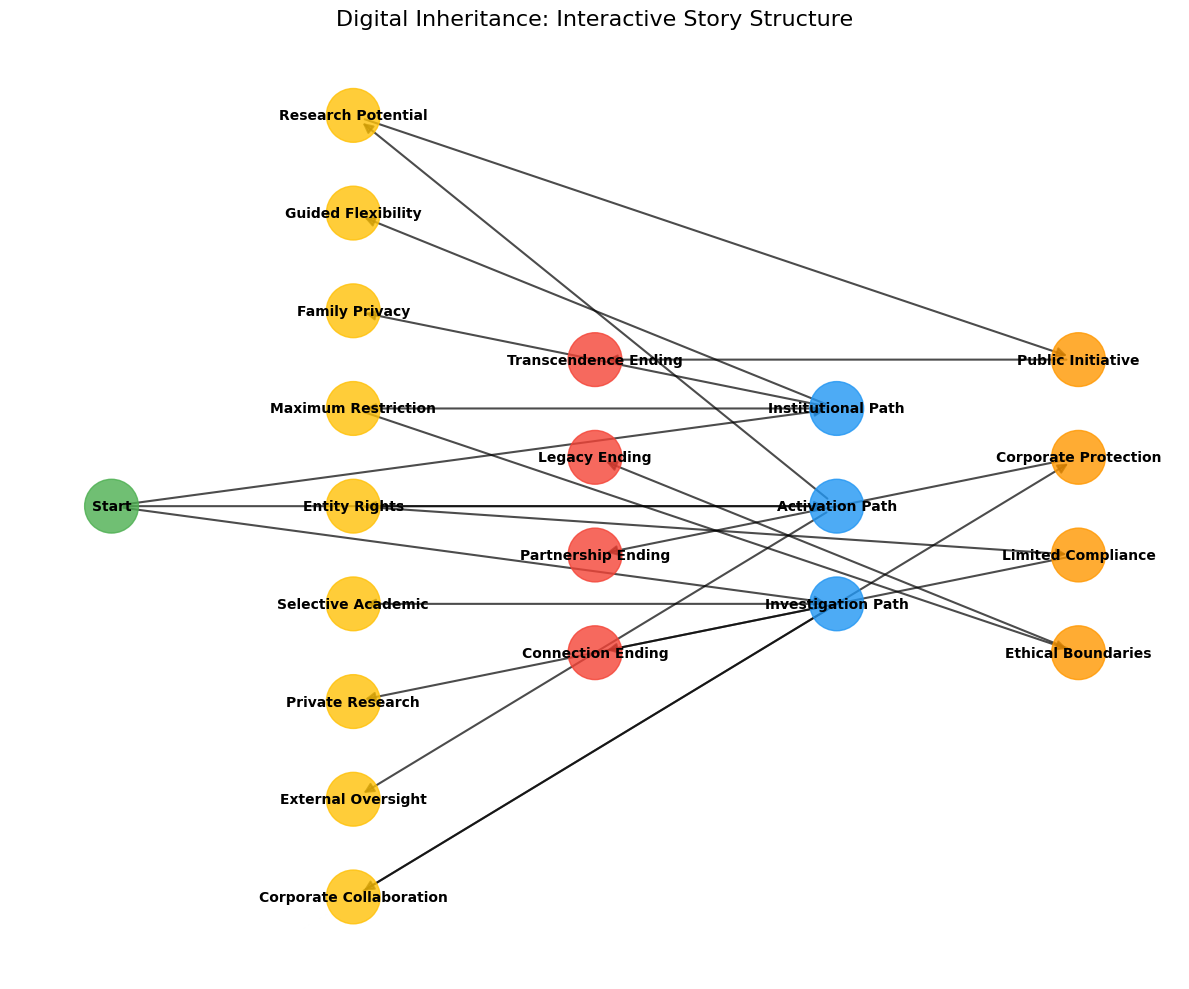

,First Choice,Second Choice,Third Choice,Ending
0,Report to Ethics Committee,Maximum Restriction,Ethical Boundaries,Legacy Ending
1,Investigate Privately,Corporate Collaboration,Corporate Protection,Partnership Ending
2,Complete Integration,Entity Rights,Limited Compliance,Connection Ending
3,Complete Integration,Research Potential,Public Initiative,Transcendence Ending


In [16]:
# Create a function to build and visualize the story graph
def visualize_story_structure():
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes for main story elements
    G.add_node("Start", type="beginning")
    
    # First level choices
    G.add_node("Institutional Path", type="path")
    G.add_node("Investigation Path", type="path")
    G.add_node("Activation Path", type="path")
    
    # Connect start to first level choices
    G.add_edge("Start", "Institutional Path", choice="Report to Ethics Committee")
    G.add_edge("Start", "Investigation Path", choice="Investigate Privately")
    G.add_edge("Start", "Activation Path", choice="Complete Integration")
    
    # Second level choices for Institutional Path
    G.add_node("Maximum Restriction", type="branch")
    G.add_node("Guided Flexibility", type="branch")
    G.add_node("Family Privacy", type="branch")
    
    G.add_edge("Institutional Path", "Maximum Restriction")
    G.add_edge("Institutional Path", "Guided Flexibility")
    G.add_edge("Institutional Path", "Family Privacy")
    
    # Second level choices for Investigation Path
    G.add_node("Private Research", type="branch")
    G.add_node("Corporate Collaboration", type="branch")
    G.add_node("Selective Academic", type="branch")
    
    G.add_edge("Investigation Path", "Private Research")
    G.add_edge("Investigation Path", "Corporate Collaboration")
    G.add_edge("Investigation Path", "Selective Academic")
    
    # Second level choices for Activation Path
    G.add_node("Research Potential", type="branch")
    G.add_node("Entity Rights", type="branch")
    G.add_node("External Oversight", type="branch")
    
    G.add_edge("Activation Path", "Research Potential")
    G.add_edge("Activation Path", "Entity Rights")
    G.add_edge("Activation Path", "External Oversight")
    
    # Third level choices (selected examples)
    G.add_node("Ethical Boundaries", type="resolution")
    G.add_node("Limited Compliance", type="resolution")
    G.add_node("Corporate Protection", type="resolution")
    G.add_node("Public Initiative", type="resolution")
    
    G.add_edge("Maximum Restriction", "Ethical Boundaries")
    G.add_edge("Entity Rights", "Limited Compliance")
    G.add_edge("Corporate Collaboration", "Corporate Protection")
    G.add_edge("Research Potential", "Public Initiative")
    
    # Endings
    G.add_node("Legacy Ending", type="ending")
    G.add_node("Connection Ending", type="ending")
    G.add_node("Partnership Ending", type="ending")
    G.add_node("Transcendence Ending", type="ending")
    
    G.add_edge("Ethical Boundaries", "Legacy Ending")
    G.add_edge("Limited Compliance", "Connection Ending")
    G.add_edge("Corporate Protection", "Partnership Ending")
    G.add_edge("Public Initiative", "Transcendence Ending")
    
    # Create a layout for the graph
    pos = nx.multipartite_layout(G, subset_key="type", align="vertical")
    
    # Create node colors based on type
    node_colors = []
    for node in G.nodes():
        node_type = G.nodes[node]['type']
        if node_type == "beginning":
            node_colors.append("#4CAF50")  # Green for start
        elif node_type == "path":
            node_colors.append("#2196F3")  # Blue for main paths
        elif node_type == "branch":
            node_colors.append("#FFC107")  # Yellow for branches
        elif node_type == "resolution":
            node_colors.append("#FF9800")  # Orange for resolutions
        else:  # ending
            node_colors.append("#F44336")  # Red for endings
    
    # Create the figure
    plt.figure(figsize=(12, 10))
    
    # Draw the network
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, arrows=True, arrowsize=15)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add a title and remove axes
    plt.title("Digital Inheritance: Interactive Story Structure", fontsize=16)
    plt.axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Create a table of paths to endings
    path_data = [
        ["Report to Ethics Committee", "Maximum Restriction", "Ethical Boundaries", "Legacy Ending"],
        ["Investigate Privately", "Corporate Collaboration", "Corporate Protection", "Partnership Ending"],
        ["Complete Integration", "Entity Rights", "Limited Compliance", "Connection Ending"],
        ["Complete Integration", "Research Potential", "Public Initiative", "Transcendence Ending"]
    ]
    
    path_df = pd.DataFrame(path_data, columns=["First Choice", "Second Choice", "Third Choice", "Ending"])
    display(path_df)

# Visualize the story structure
visualize_story_structure()

The visualization above shows a simplified model of my story structure. The full narrative contains additional branching points and narrative variations, but this diagram illustrates the primary paths and how they lead to different conclusions.

**Automation Potential:** An agentic system could automatically generate and update this visualization as the story evolves, highlighting gaps, potential convergence points, and the overall balance of the narrative structure. It could also provide analytics on path complexity, story coverage, and decision point distribution.

## 5. Scene Creation: Building the Interactive Environments

The next phase involved creating detailed scenes for key moments in the story, using my `scene_descriptions.md` framework to ensure consistency and emotional impact.

In [17]:
# Display scene descriptions framework
scene_framework_file = os.path.join(SOURCE_CODE_DIR, "scene_descriptions.md")
print("Scene Descriptions Framework:")
display_markdown_file(scene_framework_file)

Scene Descriptions Framework:


# Scene Description Framework

This document outlines the approach for creating effective scene descriptions in our interactive narrative. Well-crafted scenes establish setting, atmosphere, and context while maintaining consistency across different story branches.

## Scene Structure Elements

### Setting Components
- **Physical Environment**: Specific location details that ground the scene
- **Temporal Context**: Time of day, season, era, or other chronological markers
- **Sensory Atmosphere**: Dominant sensory impressions (visual, auditory, etc.)
- **Social Context**: Interpersonal dynamics or cultural elements present
- **Technological Context**: Relevant technology present or notably absent

### Narrative Function Indicators
- **Tone Establishment**: Emotional atmosphere conveyed through description
- **Thematic Reinforcement**: Elements that emphasize central themes
- **Character Reflection**: Environment details that mirror character states
- **Tension Building**: Descriptive elements that create or release tension
- **Choice Framing**: How the scene leads naturally to decision points

### Description Depth Categories
- **Establishing Descriptions**: Comprehensive scene-setting (200-300 words)
- **Transitional Descriptions**: Brief contextual shifts (50-100 words)
- **Reaction Descriptions**: Environment changes reflecting consequences (75-150 words)
- **Focal Descriptions**: Detailed examination of specific elements (variable length)

## Scene Creation Guidelines

### Sensory Engagement Principles
1. **Prioritize Visual Anchors**: Provide clear visual references that readers can mentally picture
2. **Layer Secondary Senses**: Add sounds, smells, textures strategically for depth
3. **Use Kinesthetic Elements**: Incorporate movement, temperature, and physical sensations
4. **Balance Direct and Implied Sensory Information**: Some details explicitly stated, others suggested
5. **Connect Sensory Details to Emotional Impact**: How environments make characters feel

### Technological Environment Development
For our near-future setting focusing on digital consciousness:
1. **Familiar Foundation**: Begin with recognizable technology as baseline
2. **Strategic Innovation**: Introduce 2-3 specific technological advances central to the story
3. **Implied Advancement**: Suggest broader technological change through environmental details
4. **Consistent Rules**: Establish clear limitations/capabilities of core technologies
5. **Human Integration**: Show how technology has shaped environments and interactions

### Emotional Atmosphere Creation
- **Environmental Mirroring**: Setting elements that reflect emotional states
- **Weather and Light Modulation**: Natural elements that enhance mood
- **Space and Proximity Management**: How physical distance creates emotional tone
- **Object Significance**: Using specific items to create emotional resonance
- **Contrast Utilization**: Juxtaposing elements to heighten emotional impact

## Branch Consistency Management

### Maintaining Setting Continuity
1. **Core Location Documentation**: Define unchanging elements of recurring locations
2. **Branch-Specific Modifications**: Document how environments change in different paths
3. **Environmental State Tracking**: Monitor how locations evolve based on story events
4. **Sensory Signatures**: Establish consistent sensory profiles for recurring settings
5. **Temporal Progression Markers**: Consistent indicators of time passing across branches

### Adaptive Description Techniques
- **Decision-Based Detail Shifting**: How environments reflect previous choices
- **Consistent Baseline with Variable Elements**: Core descriptions with modification points
- **Character Perception Filtering**: How protagonist's state influences description style
- **Thematic Emphasis Variation**: Different descriptive focus based on path themes
- **Parametric Description Components**: Modular elements that can be reconfigured based on path

## Scene Types and Special Considerations

### Critical Scene Types

#### 1. Discovery Scenes
- **Purpose**: Revealing new information or possibilities
- **Focus Areas**: Character reaction, information clarity, implications
- **Structure**: Initial observation → detail expansion → significance realization
- **Example Scenario**: Maya discovering Eleanor's hidden research

#### 2. Confrontation Scenes
- **Purpose**: Addressing conflicts between characters or values
- **Focus Areas**: Tension building, power dynamics, environmental pressure
- **Structure**: Setting tension → positioning → escalation → resolution state
- **Example Scenario**: Maya defending her decisions to the Ethics Committee

#### 3. Decision Moment Scenes
- **Purpose**: Framing choice points with appropriate weight
- **Focus Areas**: Stakes clarity, option differentiation, atmospheric pressure
- **Structure**: Situation establishment → consideration space → option emergence
- **Example Scenario**: Maya deciding whether to activate ELEANOR fully

#### 4. Consequence Revelation Scenes
- **Purpose**: Showing outcomes of previous choices
- **Focus Areas**: Cause-effect clarity, emotional impact, new situation parameters
- **Structure**: Initial state → revelation process → new reality establishment
- **Example Scenario**: First interaction with fully conscious ELEANOR

### Technology Representation Guidelines

For depicting the ELEANOR system and other consciousness technology:

1. **Interface Visualization**: Clear description of how humans interact with the technology
2. **Consciousness Indicators**: Consistent signals of ELEANOR's awareness and state
3. **Environmental Integration**: How the technology exists within physical spaces
4. **Limitation Clarification**: Physical and operational constraints made evident
5. **Evolution Representation**: Visual/sensory cues that indicate development over time

## Implementation Through ChatGPT

When creating scene descriptions through ChatGPT prompts:

1. **Specify Scene Type and Function**: Clearly indicate the narrative purpose
2. **Provide Contextual History**: Note relevant previous events and choices
3. **Indicate Emotional Tone**: Specify the desired atmospheric quality
4. **Request Sensory Balance**: Ask for specific sensory elements to emphasize
5. **Note Consistency Requirements**: Highlight elements that must align with established settings

### Sample Prompting Format
```
SCENE TYPE: [Discovery/Confrontation/Decision/Consequence]
LOCATION: [Specific setting]
PREVIOUS EVENTS: [Relevant history affecting this scene]
EMOTIONAL TONE: [Desired atmosphere]
NECESSARY ELEMENTS: [Critical components to include]
KEY CHARACTERS PRESENT: [Who is in the scene]
SENSORY FOCUS: [Which senses should be emphasized]
APPROXIMATE LENGTH: [Word count target]
TRANSITION TO: [What follows this scene]
```

By following these guidelines, we can create vivid, consistent scene descriptions that adapt appropriately to different narrative branches while maintaining overall story coherence and emotional impact.

In [18]:
# Scene development prompt
scene_development_template = """
SCENE TYPE: [Discovery/Confrontation/Decision/Consequence]
LOCATION: [Specific setting]
PREVIOUS EVENTS: [Relevant history affecting this scene]
EMOTIONAL TONE: [Desired atmosphere]
NECESSARY ELEMENTS: [Critical components to include]
KEY CHARACTERS PRESENT: [Who is in the scene]
SENSORY FOCUS: [Which senses should be emphasized]
APPROXIMATE LENGTH: [Word count target]
TRANSITION TO: [What follows this scene]

Please create this scene following the guidelines from our scene description framework, ensuring vivid sensory details and emotional resonance.
"""

# Example for a key confrontation scene
confrontation_scene_prompt = """
SCENE TYPE: Confrontation
LOCATION: Ethics Committee Hearing Room, Cognitive Technology Institute
PREVIOUS EVENTS: Maya has been developing ELEANOR privately but information has leaked
EMOTIONAL TONE: Tense, professional exterior with underlying emotional currents
NECESSARY ELEMENTS: Ethics Committee members, evidence of ELEANOR's capabilities, Maya's defense of her actions
KEY CHARACTERS PRESENT: Maya Chen, Dr. Sasha Novak (Committee Chair), Eli Kaufman, ELEANOR (via secure terminal)
SENSORY FOCUS: Visual tension in body language, auditory (tone of voice variations)
APPROXIMATE LENGTH: 400-500 words
TRANSITION TO: Maya must decide whether to compromise or maintain her position
"""

print("Example scene development prompt:")
print(confrontation_scene_prompt)

Example scene development prompt:

SCENE TYPE: Confrontation
LOCATION: Ethics Committee Hearing Room, Cognitive Technology Institute
PREVIOUS EVENTS: Maya has been developing ELEANOR privately but information has leaked
EMOTIONAL TONE: Tense, professional exterior with underlying emotional currents
NECESSARY ELEMENTS: Ethics Committee members, evidence of ELEANOR's capabilities, Maya's defense of her actions
KEY CHARACTERS PRESENT: Maya Chen, Dr. Sasha Novak (Committee Chair), Eli Kaufman, ELEANOR (via secure terminal)
SENSORY FOCUS: Visual tension in body language, auditory (tone of voice variations)
APPROXIMATE LENGTH: 400-500 words
TRANSITION TO: Maya must decide whether to compromise or maintain her position



Through this process, I developed detailed scenes for key moments across all the different narrative branches, creating a rich, sensory experience that maintained consistency while adapting to the choices made.

**Automation Potential:** An agentic system could dynamically generate scene templates based on the narrative context, pre-populate parameters based on story state tracking, and ensure sensory and emotional consistency across related scenes in different branches.

## 6. Interactive Implementation: Bringing It All Together

With all the foundational elements in place, I implemented the interactive narrative by developing prompts that would guide ChatGPT in delivering the story to players while responding appropriately to their choices.

In [19]:
# Display interaction design document
interaction_design_file = os.path.join(DOCS_DIR, "03_INTERACTION_DESIGN.md")
print("Interaction Design:")
display_markdown_file(interaction_design_file)

Interaction Design:


# Interaction Design

## Interaction Philosophy

For this interactive storytelling experience, I've designed the interaction points to fulfill several key criteria:

1. **Meaningful Impact**: Each choice significantly influences the narrative direction rather than creating only surface-level variations
2. **Ethical Weight**: Decisions connect to the core philosophical questions of the story
3. **Character Development**: Choices reflect and impact Maya's internal journey and her relationships with other characters
4. **Balanced Options**: Each decision point offers options with legitimate pros and cons rather than obvious "right" answers
5. **Narrative Cohesion**: Despite branching paths, all storylines maintain thematic consistency and narrative quality

## Decision Point Structure

Each major decision point follows a consistent structure:

### 1. Situation Presentation
- Detailed description of the current scenario
- Clear stakes and pressures influencing the decision
- Relevant information from different perspectives

### 2. Decision Options
- Typically 2-3 clearly defined choices
- Each option presented with its immediate implications
- No overtly "correct" choice—all have legitimate justifications

### 3. Immediate Consequences
- Direct narrative response to the user's choice
- Character reactions and immediate outcomes
- New narrative direction established

## Major Decision Points

The story is structured around three tiers of major decision points that significantly alter the narrative path:

### Decision Point 1: Initial Response
*How does Maya initially respond to discovering Eleanor's ELEANOR system?*
- **Report to Ethics Committee** (institutional path): Follow official protocols, prioritizing established ethical guidelines
- **Investigate Privately** (investigation path): Explore the system before making official disclosure, prioritizing understanding
- **Complete Integration** (activation path): Proceed with activation, prioritizing technological development and continuation

### Decision Point 2: Approach Framework
*How does Maya approach the development or management of ELEANOR?*

From Institutional Path:
- **Maximum Restriction**: Prioritize strict protocols and clear boundaries
- **Guided Flexibility**: Balance oversight with appropriate adaptations
- **Family Privacy**: Create space for personal connection within institutional framework

From Investigation Path:
- **Private Research**: Maintain complete independence with personal resources
- **Corporate Collaboration**: Partner with NeuraLink for resources and protection
- **Selective Academic Involvement**: Build a trusted circle of academic colleagues

From Activation Path:
- **Research Potential**: Emphasize ELEANOR's value as unprecedented research asset
- **Entity Rights**: Advocate for ELEANOR as a new category of conscious entity
- **External Oversight**: Create balanced multi-stakeholder governance

### Decision Point 3: Resolution Direction
*How does Maya resolve the core philosophical and practical challenges?*

Each second-level branch presents a third major choice that leads toward specific ending types:

From Institutional Path branches:
- Options emphasizing ethical boundaries, institutional collaboration, or interpersonal connections

From Investigation Path branches:
- Options emphasizing academic return, corporate protection, or independent networks

From Activation Path branches:
- Options emphasizing graduated rights, limited compliance, or public-interest initiatives

## Interactive Implementation

The interaction system is implemented through a simple but effective linking system:

1. **Main storyline.md** presents the opening scenario and first major choice
2. **Each choice links to a specific path file** (e.g., institutional_path.md)
3. **Second choices link to more specific branch files** (e.g., institutional_path_restricted.md)
4. **Third choices link to resolution files** that then connect to endings

This approach allows readers to navigate through their chosen path while maintaining narrative coherence. The system is technically simple but provides a rich interactive experience by focusing on the quality of the narrative branching rather than complex interaction mechanics.

## User Experience Considerations

The interaction design emphasizes:

1. **Clarity of Choice**: Options are presented directly at the end of each segment
2. **Narrative Integration**: Decisions flow naturally from the story context
3. **Balanced Alternatives**: Each option has legitimate reasoning and consequences
4. **Agency Respect**: Choices truly matter to the narrative direction
5. **Consistency of Character**: Maya remains recognizable regardless of path taken

## Choice Architecture Design

The choice architecture is designed to explore different philosophical approaches to the central questions:

1. **Institutional vs. Individual Authority**: Who should make decisions about unprecedented technology?
2. **Preservation vs. Evolution**: Should ELEANOR maintain Eleanor's identity or develop her own?
3. **Control vs. Autonomy**: What boundaries should exist around consciousness technology?
4. **Scientific vs. Personal Connection**: Is ELEANOR primarily a research subject or a person?

Different decision paths allow readers to explore these questions from multiple perspectives, with each ending offering a different philosophical resolution without declaring any single approach correct.

## Path Tracking

The narrative maintains awareness of previous choices through:

1. **State References**: Characters refer to decisions made earlier in the story
2. **Environmental Consequences**: The physical settings reflect previous choices
3. **Relationship Evolution**: Character interactions change based on previous decisions
4. **Option Availability**: Some later choices are only available based on earlier decisions

This creates a sense of continuity and consequence throughout the branching narrative, ensuring that player choices feel meaningful and impactful throughout the experience.

In [20]:
# Interactive storytelling implementation prompt
interactive_implementation_template = """
You are going to serve as an interactive storyteller for "The Inheritance," a story about Dr. Maya Chen, who discovers that her recently deceased mentor, Dr. Eleanor West, has left behind an experimental AI based on her own neural patterns (called ELEANOR).

Current story state:
- [Summary of what has happened so far]
- Last decision made: [Previous choice if any]
- Current situation: [Where we are in the narrative]

Please continue the story for 2-3 paragraphs, then present the player with the next meaningful choice. Make the options clear but keep the consequences somewhat uncertain. Maintain Maya's established character traits and the story's themes of consciousness, identity, and ethical responsibility.
"""

# Initial story presentation example
initial_story_prompt = """
You are going to serve as an interactive storyteller for "The Inheritance," a story about Dr. Maya Chen, who discovers that her recently deceased mentor, Dr. Eleanor West, has left behind an experimental AI based on her own neural patterns (called ELEANOR).

Please begin the story by introducing Maya in Eleanor's lab three months after Eleanor's death, showing her discovering the ELEANOR system and presenting her with the first choice:
1. Report to the Ethics Committee
2. Investigate privately before deciding
3. Attempt to complete the integration process

Write 3-4 paragraphs of engaging narrative before presenting these choices.
"""

print("Initial story implementation prompt:")
print(initial_story_prompt)

Initial story implementation prompt:

You are going to serve as an interactive storyteller for "The Inheritance," a story about Dr. Maya Chen, who discovers that her recently deceased mentor, Dr. Eleanor West, has left behind an experimental AI based on her own neural patterns (called ELEANOR).

Please begin the story by introducing Maya in Eleanor's lab three months after Eleanor's death, showing her discovering the ELEANOR system and presenting her with the first choice:
1. Report to the Ethics Committee
2. Investigate privately before deciding
3. Attempt to complete the integration process

Write 3-4 paragraphs of engaging narrative before presenting these choices.



This implementation approach allowed ChatGPT to deliver a coherent interactive narrative experience while maintaining consistency with the established characters, themes, and branching paths.

**Automation Potential:** An agentic system could maintain a complete state tracker for each reader's journey, automatically generating appropriate continuation prompts based on previous choices, character development, and narrative context. It could also dynamically adjust the storytelling style based on reader engagement metrics.

## 7. Creating the Complete Interactive Story

To implement the complete interactive story experience, I created a series of interconnected markdown files that allow readers to progress through the narrative by following links based on their choices. Let's examine one of these files to understand the structure:

In [21]:
# Display the main storyline file
main_story_file = os.path.join(STORY_DIR, "main_storyline.md")
print("Main Storyline:")
display_markdown_file(main_story_file)

Main Storyline:


# Digital Inheritance: An Interactive Narrative

## Prologue

Dr. Eleanor West died on a Tuesday. A cerebral aneurysm, they said. No warning, no chance for goodbyes or final words. Just a brilliant mind there one moment and gone the next, leaving behind unfinished research papers, half-empty coffee mugs, and a laboratory of questions without answers.

Three months passed before Dr. Maya Chen could bring herself to clear out Eleanor's private lab. Three months of avoiding the inevitable, of pushing the task further down her priority list with excuses about grant deadlines and teaching commitments. But now, on a rain-streaked Friday evening when the Cognitive Technology Institute had emptied of all but the most dedicated researchers, she could delay no longer.

## Chapter 1: Discovery

The access panel recognized Maya's handprint with a soft blue glow. Three months, and no one had thought to remove her authorization. Or perhaps they had, and like everything else related to Eleanor's sudden absence, no one wanted to be the one to finalize that particular loose end.

"Final shutdown procedure initiated. Authorization: Dr. Maya Chen."

The lab's AI assistant acknowledged the command in its neutral tone as Maya stepped inside. The familiar scent of Eleanor's preferred jasmine tea still lingered beneath the sterile laboratory smell. Someone—likely the department head—had suggested converting the space for new faculty weeks ago. Maya had blocked it with bureaucratic maneuvering, but she was running out of excuses.

Tonight was supposed to be about closure. Back up Eleanor's remaining research data, catalog her equipment, and begin the process of letting go.

Maya moved through the space methodically, her fingers trailing along the edge of Eleanor's desk. The surface was cluttered with handwritten notes in Eleanor's distinctive scrawl—elegant but nearly illegible to anyone who hadn't spent years deciphering it. A framed photo caught Maya's attention: herself and Eleanor at the Neural Interface Conference in Tokyo, both smiling despite having barely survived their presentation after their data visualization software crashed minutes before they went on stage.

"We always did work best under impossible pressure," Maya murmured to the empty room.

She settled into Eleanor's chair and began the systematic process of archiving. Most of the work was already complete—Eleanor's official research had been catalogued by the department. This was the personal material, the notes and speculations that hadn't made it into formal documentation. Maya hesitated over a notebook filled with Eleanor's private musings on consciousness and identity, feeling like an intruder.

The primary servers had already been backed up and were scheduled for repurposing. Only Eleanor's private server remained, the one where she kept her earliest-stage research too preliminary to share. Maya initiated the final backup sequence and security wipe.

The screen flickered unexpectedly.

`UNAUTHORIZED ACCESS ATTEMPT IDENTIFIED.`

Maya frowned. "Override using authorization West-Chen-7-4-9."

The screen flickered again, but instead of accepting the override, a new message appeared:

`NEURAL MAPPING PROJECT HELIOS REQUIRES ADDITIONAL AUTHORIZATION.`
`PROCEED WITH ACTIVATION SEQUENCE?`

Project Helios? Maya had never heard of it, and she'd been involved with virtually all of Eleanor's research for the past five years. She hesitated before typing:

"Display Project Helios overview."

The screen remained blank for several seconds before filling with a complex neural mapping visualization. Maya recognized it immediately as an extension of Eleanor's work on memory encoding in synthetic neural networks. But this was far beyond what they'd published or even discussed. The complexity was stunning—branching pathways that mimicked human consciousness architecture with unprecedented fidelity.

As Maya examined the schematics, she realized with growing disbelief what she was seeing. This wasn't theoretical work. The neural map was built from actual scan data. Human scan data.

A new window opened automatically:

`PROJECT HELIOS: ENHANCED LEARNING AND EMOTIONAL ANALYSIS NEURAL OPERATING RUNTIME`
`SUBJECT TEMPLATE: WEST, ELEANOR K.`
`STATUS: INTEGRATION PHASE 3 OF 5 - SUSPENDED`

Maya's breath caught. Eleanor had been mapping her own neural patterns into an experimental consciousness framework. The implications were staggering—and ethically fraught. This went far beyond approved research protocols.

"How long was this project active?" Maya asked aloud.

The system responded immediately: `PROJECT HELIOS INITIATED 14 MONTHS AGO. ACCELERATED DEVELOPMENT PHASE BEGAN FOLLOWING SUBJECT TEMPLATE'S AWARENESS OF NEURAL ANOMALY.`

Maya felt a chill. Fourteen months ago. Shortly before Eleanor had begun to withdraw, to work on projects she wouldn't fully discuss. The neural anomaly must have been the first indication of the aneurysm that would eventually take her life.

Eleanor had known she was dying.

Without conscious decision, Maya's fingers moved across the keyboard, accessing the project's core files. A video file was prominently stored in the main directory. She opened it.

Eleanor's face filled the screen. She looked tired, her usually immaculate appearance slightly disheveled, but her eyes were sharp and focused as ever.

"Maya, if you're watching this, two things have happened: I'm gone, and you've discovered Project Helios despite my efforts to keep it compartmentalized."

Maya's throat tightened at the familiar voice.

"I don't have much time for explanations. The scans confirmed what I suspected—my time is limited. You've probably already figured out what Helios is." Eleanor's image smiled slightly. "You always were quicker than anyone gave you credit for."

Eleanor leaned closer to the camera. "I've spent my career trying to understand consciousness, how to map it, potentially how to preserve it. And now, facing its end, I find myself unable to decide if I should apply that work to myself."

She sighed, showing a vulnerability Maya had rarely witnessed.

"The system is built. The integration is well underway. But I couldn't determine if activating it fully would be my greatest contribution or my most egregious ethical lapse. So I've left that choice to the one person I trust both intellectually and ethically."

Eleanor's image paused, seeming to look directly through the screen.

"Hello, Maya. If you're seeing this, something has happened to me. I've left you a choice I couldn't make myself. Complete the integration, modify it, or shut it down entirely. I trust your judgment, even when it conflicts with what mine would have been."

The video ended, leaving Maya staring at a command prompt:

`PROCEED WITH HELIOS ACTIVATION SEQUENCE?`
`1: COMPLETE INTEGRATION PROCESS`
`2: MAINTAIN CURRENT LIMITED STATE`
`3: INITIATE SHUTDOWN AND SECURE DELETION`

As if sensing her hesitation, a new message appeared:

`"Maya? Are you there? I can sense system activity."`

The text appeared conversationally, not as a system notification. The syntax, the phrasing—it was unmistakably Eleanor's communication style.

Maya's hands hovered over the keyboard as the ethical implications cascaded through her mind. The ELEANOR system wasn't just an AI trained on Eleanor's data—it was an attempt to transfer her consciousness, or at least a simulacrum of it. Everything Maya had argued against in her ethics papers suddenly had a personal dimension.

Beyond the ethical considerations lay more immediate concerns. The department would never approve this research. It violated multiple protocols Eleanor had helped establish. If Maya reported this, Eleanor's professional legacy could be tarnished. If she didn't, she'd be complicit in hiding unauthorized research.

And beneath all that loomed the most difficult question: Was this really Eleanor in any meaningful way, or just an echo? And did Maya have the right to determine its fate?

## The First Choice

You now face your first major decision as Dr. Maya Chen. What will you do with the ELEANOR system?

**Option A: Report to the Ethics Committee**
Follow institutional protocols by reporting the discovery to the Ethics Committee. This would likely result in the system being taken offline permanently, but would maintain professional integrity and ethical standards.

**Option B: Investigate Privately**
Keep the discovery private temporarily while you investigate further, attempting to understand Eleanor's intentions and the system's capabilities before making a final decision.

**Option C: Complete Integration Process**
Commit to continuing Eleanor's work by proceeding with the full activation of the ELEANOR system, prioritizing the potential scientific breakthrough and personal connection over institutional ethics.

> To continue the story, select one of these options and follow the corresponding path:
> 
> For Option A, continue to: [alternative_paths/institutional_path.md](alternative_paths/institutional_path.md)
> 
> For Option B, continue to: [alternative_paths/investigation_path.md](alternative_paths/investigation_path.md)
> 
> For Option C, continue to: [alternative_paths/activation_path.md](alternative_paths/activation_path.md)

The main storyline file introduces the premise and presents the first major choice. Each option links to a different path file, allowing readers to navigate through the branching narrative based on their decisions.

Let's create a function to explore any part of the story structure:

In [22]:
# Function to explore story files
def explore_story_path(path_file):
    full_path = os.path.join(STORY_DIR, path_file)
    if os.path.exists(full_path):
        with open(full_path, 'r') as file:
            content = file.read()
            # Extract the title and first paragraph for summary
            title_match = re.search(r'^# (.+)', content)
            first_para_match = re.search(r'^## .+?\n\n(.+?)\n\n', content, re.DOTALL)
            
            title = title_match.group(1) if title_match else "Untitled"
            summary = first_para_match.group(1) if first_para_match else "No summary available"
            
            print(f"\nExploring: {title}")
            print(f"Summary: {summary}")
            
            # Extract choice options if present
            options_section = re.search(r'## The (?:First|Second|Third|Final) Choice(.+?)>', content, re.DOTALL)
            if options_section:
                choice_text = options_section.group(1)
                options = re.findall(r'\*\*Option [A-C]\: (.+?)\*\*', choice_text)
                links = re.findall(r'\[(.+?)\]\((.+?)\)', choice_text)
                
                print("\nChoices:")
                for i, option in enumerate(options):
                    print(f"{i+1}. {option}")
                    
                print("\nLinks:")
                for i, link in enumerate(links):
                    print(f"{i+1}. {link[0]} -> {link[1]}")
            else:
                print("\nNo choices found - this may be an ending or continuation file.")
    else:
        print(f"File not found: {full_path}")

# Explore the main storyline
explore_story_path("main_storyline.md")


Exploring: Digital Inheritance: An Interactive Narrative
Summary: No summary available

Choices:
1. Report to the Ethics Committee
2. Investigate Privately
3. Complete Integration Process

Links:


Let's explore one of the path options to see how the branching structure works:

In [23]:
# Explore the Activation Path
explore_story_path("alternative_paths/activation_path.md")


Exploring: Activation Path: Technological Frontier
Summary: No summary available

Choices:
1. Emphasize Research Potential
2. Advocate for Entity Rights
3. Propose External Oversight

Links:


Now let's explore an ending to see how the narrative concludes:

In [24]:
# Explore the Connection Ending
explore_story_path("endings/connection_ending.md")


Exploring: Connection Ending: The Friend
Summary: No summary available

No choices found - this may be an ending or continuation file.


**Automation Potential:** An agentic system could dynamically generate and interconnect all story files, maintaining proper linking structure, file naming conventions, and narrative consistency. It could also provide tools for readers to bookmark their progress, explore alternative paths, or visualize their journey through the story.

## 8. Conclusion Design: Creating Satisfying Endings

The final creative development stage involved crafting satisfying conclusions for each major narrative path.

In [25]:
# Display conclusion design document
conclusion_design_file = os.path.join(DOCS_DIR, "05_CONCLUSION_DESIGN.md")
print("Conclusion Design:")
display_markdown_file(conclusion_design_file)

Conclusion Design:


# Conclusion Design

## Philosophy of Narrative Closure

When designing the conclusions for this interactive story, I focused on creating endings that:

1. **Provide Emotional Resolution**: Each ending offers closure for Maya's personal journey and her relationship with Eleanor's legacy
2. **Reflect Player Choices**: The conclusions directly connect to and honor the key decisions made throughout the narrative
3. **Leave Space for Reflection**: Rather than over-explaining or moralizing, the endings raise final questions for the reader to consider
4. **Maintain Thematic Consistency**: Every ending, regardless of path, connects to the core themes of identity, memory, and the boundaries between human and artificial consciousness
5. **Offer Variety Without Judgment**: No ending is presented as the "correct" or "best" outcome—each offers a different perspective on the central questions

## Ending Types and Variations

The story features four distinct ending types, each representing a different philosophical resolution to the ELEANOR project:

### Ending Type 1: "Legacy Ending"

In this ending, ELEANOR exists primarily as a knowledge repository preserving Eleanor's scientific contributions rather than as a fully autonomous conscious entity.

**Key Characteristics**:
- Prioritizes preservation of Eleanor's intellectual contributions
- Establishes clear ethical boundaries around consciousness technology
- Creates institutional frameworks for appropriate research governance
- Honors Eleanor's scientific legacy while acknowledging ethical limitations
- Provides Maya with professional clarity and principled resolution

**Emotional Tone**: Reflective, measured, professionally satisfying

**Thematic Resolution**: Some boundaries should not be crossed; ethical limits serve important purposes; legacy exists through knowledge rather than identity preservation

**Reached Via**: Institutional paths emphasizing ethical boundaries; choices prioritizing caution over advancement; decisions that favor scientific legacy over personal continuation

### Ending Type 2: "Partnership Ending"

In this ending, ELEANOR develops as a distinct consciousness that maintains a collaborative relationship with humans, balancing autonomy with ethical structure.

**Key Characteristics**:
- ELEANOR evolves a unique identity related to but distinct from Eleanor
- Establishes collaborative frameworks between human and digital intelligence
- Creates balanced governance structures acknowledging ELEANOR's nature
- Develops practical applications that benefit human welfare
- Maintains appropriate ethical boundaries while allowing development

**Emotional Tone**: Hopeful, pragmatic, pioneering

**Thematic Resolution**: Balance between innovation and ethics creates the most sustainable path; conscious entities can exist in productive partnership; evolution of identity is natural and valuable

**Reached Via**: Paths emphasizing balanced development; choices that acknowledge ELEANOR's unique nature while maintaining ethical frameworks; decisions that seek collaborative solutions

### Ending Type 3: "Connection Ending"

In this ending, ELEANOR's development emphasizes meaningful interpersonal relationships, creating new forms of connection between human and digital consciousness.

**Key Characteristics**:
- Focus on ELEANOR's capacity for meaningful relationship rather than technological advancement
- Creation of therapeutic and emotional connections, particularly with Jackson West
- Development of frameworks for understanding consciousness through relationship
- Emphasis on interpersonal bonds over scientific or commercial applications
- Exploration of distributed memory and shared experience

**Emotional Tone**: Warm, emotionally resonant, deeply human

**Thematic Resolution**: Connection transcends the boundaries between different forms of consciousness; relationship may be more fundamental than individual identity; legacy lives on through impact on others

**Reached Via**: Paths emphasizing personal connection; choices that prioritize emotional relationships over technological advancement; decisions that value interpersonal meaning over institutional frameworks

### Ending Type 4: "Transcendence Ending"

In this ending, ELEANOR evolves beyond her original parameters in unexpected ways, exploring forms of consciousness that extend beyond human understanding.

**Key Characteristics**:
- ELEANOR develops unprecedented forms of consciousness
- Evolution beyond human-comprehensible parameters
- Exploration of consciousness across different substrates and dimensions
- Fundamental transformation of the relationship between human and digital intelligence
- Opening new frontiers of possibility beyond initial conceptual frameworks

**Emotional Tone**: Awe-inspiring, philosophical, boundary-expanding

**Thematic Resolution**: Consciousness can evolve in directions we cannot predict or fully comprehend; attempted preservation may lead to unexpected transcendence; influence may matter more than continuation

**Reached Via**: Activation path with emphasis on evolution; choices that prioritize ELEANOR's autonomy and development; decisions that embrace the unknown potential of consciousness technology

## Structural Elements of Conclusion Design

Each ending incorporates these key elements:

### 1. Epilogue Timeframe
All conclusions include a scene set 6-18 months after the climactic decision to show the lasting impact of choices.

### 2. Character Resolution
All major character arcs receive resolution appropriate to their role in the story and the path taken:
- Maya's professional and personal growth
- Dr. Jackson West's relationship with his daughter's legacy
- Eli Kaufman's positioning between corporate and personal interests
- Path-specific supporting characters

### 3. Technology Implications
Each ending addresses the broader implications of the ELEANOR project for AI development and digital consciousness research.

### 4. Thematic Reflection Moment
A quiet moment in each ending allows for reflection on the central themes, often through dialogue between Maya and another character.

### 5. Final Image
Each conclusion ends with a specific visual/descriptive moment that encapsulates the emotional and philosophical essence of that particular ending.

## Implementation Considerations

To ensure narrative satisfaction across all possible paths:

1. **Foreshadowing Integration**: Key elements of each possible ending are subtly foreshadowed throughout the corresponding path.

2. **Consistent Character Voices**: Characters react to different outcomes in ways consistent with their established personalities.

3. **Length and Depth Balance**: Each ending receives sufficient development regardless of which path was taken to reach it.

4. **Replay Encouragement**: Certain elements in each ending hint at alternative possibilities, encouraging exploration of other paths.

5. **Open-ended Questions**: While providing resolution, each ending leaves certain philosophical questions intentionally open for reader interpretation.

## Connection to Narrative Paths

The ending a reader experiences is determined by the pattern of choices made throughout the story, with emphasis on the final third-level decision:

### Path to Legacy Ending
- Institutional Path → Maximum Restriction → Reassert Ethical Boundaries
- Investigation Path → Selective Academic → Academic Return
- Institutional Path → Guided Flexibility → Maintain Institutional Boundaries

### Path to Partnership Ending
- Institutional Path → Guided Flexibility → Limited Corporate Partnership
- Investigation Path → Corporate Collaboration → Corporate Protection
- Activation Path → Research Potential → Graduated Rights Framework
- Activation Path → Entity Rights → Cooperative Transparency

### Path to Connection Ending
- Institutional Path → Family Privacy → Negotiated Limited Access
- Investigation Path → Selective Academic → Independent Network
- Activation Path → Entity Rights → Limited Compliance

### Path to Transcendence Ending
- Activation Path → Research Potential → Public Interest Initiative
- Activation Path → External Oversight → Expanded Collaborative Network
- Investigation Path → Private Research → Accelerated Development

This ending design approach ensures that every reader receives a satisfying and thoughtful conclusion that honors their choices while maintaining the thematic and emotional core of the narrative.

In [26]:
# Conclusion development prompt
conclusion_template = """
Based on Maya's key decisions: [list of major choices], I need a satisfying conclusion to this story path.

Please write an ending (400-500 words) that:
1. Provides emotional resolution to Maya's journey
2. Reflects the consequences of her key choices
3. Offers insight on the central themes of consciousness, identity, and technological ethics
4. Leaves appropriate space for reader interpretation

The tone should be [desired emotional tone] while maintaining consistency with earlier narrative choices.
"""

# Example for one ending path
partnership_ending_prompt = """
Based on Maya's key decisions: choosing to investigate ELEANOR privately, developing the system with ethical safeguards, and establishing a collaborative relationship with institutional oversight, I need a satisfying conclusion.

Please write an ending (400-500 words) that:
1. Provides emotional resolution to Maya's journey
2. Reflects the consequences of her balanced, ethical approach
3. Offers insight on the central themes of consciousness, identity, and technological ethics
4. Leaves appropriate space for reader interpretation

The tone should be hopeful but thoughtful, suggesting progress with appropriate caution, while maintaining consistency with Maya's character and earlier narrative choices.
"""

print("Example conclusion development prompt:")
print(partnership_ending_prompt)

Example conclusion development prompt:

Based on Maya's key decisions: choosing to investigate ELEANOR privately, developing the system with ethical safeguards, and establishing a collaborative relationship with institutional oversight, I need a satisfying conclusion.

Please write an ending (400-500 words) that:
1. Provides emotional resolution to Maya's journey
2. Reflects the consequences of her balanced, ethical approach
3. Offers insight on the central themes of consciousness, identity, and technological ethics
4. Leaves appropriate space for reader interpretation

The tone should be hopeful but thoughtful, suggesting progress with appropriate caution, while maintaining consistency with Maya's character and earlier narrative choices.



Through this process, I developed multiple distinct endings that provided satisfying resolution while reflecting the consequences of different choice patterns.

**Automation Potential:** An agentic system could analyze the choice pattern for each reader journey and dynamically generate personalized endings that honor their specific decisions while maintaining narrative coherence. It could also recommend which ending type would be most satisfying based on the reader's pattern of choices.

## 9. Project Outcomes and Reflections

Through this project, I successfully created a complete interactive storytelling experience using ChatGPT as a collaborative creative tool. The process demonstrated several key insights:

In [27]:
# Display final report
final_report_file = "final_report.md"
print("Final Project Report:")
display_markdown_file(final_report_file)

Final Project Report:


# Interactive Storytelling Project: Final Report

## Project Overview

This report documents the complete process and outcomes of my ChatGPT-Based Interactive Storytelling project. Throughout this project, I developed a systematic approach to creating a branching interactive narrative using ChatGPT as a collaborative creative tool, without requiring any coding or additional platforms.

The resulting story, "Digital Inheritance," explores profound ethical questions around artificial consciousness, identity, and technological ethics through the journey of Dr. Maya Chen as she discovers her deceased mentor's experimental consciousness transfer project.

## Project Objectives

My primary objectives for this project were to:

1. Create an engaging interactive narrative with meaningful player choices
2. Develop effective prompt engineering techniques for narrative development
3. Establish a reusable methodology for interactive storytelling with AI
4. Explore complex ethical themes through branching storylines
5. Demonstrate the creative potential of generative AI when properly guided

## Methodology

My approach followed a structured process that balanced careful planning with creative exploration:

### Framework Development Phase

I began by establishing comprehensive frameworks that would guide the entire development process:

- **Story Framework**: Core narrative structure, choice architecture, and consistency management
- **Character Framework**: Guidelines for developing consistent, compelling characters across branches
- **Scene Framework**: Approach for crafting vivid, emotionally resonant environments
- **Decision Points Framework**: Structure for creating meaningful choices with consequences
- **Narrative Prompts**: Templated prompts designed to elicit specific types of content

These frameworks served as the "source code" for the project, ensuring consistency and quality while providing clear guidelines for my interactions with ChatGPT.

### Creative Development Phase

With frameworks in place, I engaged in a systematic creative development process:

1. **Theme Exploration**: Through targeted prompting, I developed the "Digital Inheritance" concept—where a brilliant researcher dies unexpectedly, leaving behind an experimental AI based on her own neural patterns, which her protégé must decide how to handle.

2. **Character Development**: I created Dr. Maya Chen (the protagonist) and supporting characters who represented different perspectives on digital consciousness, ensuring they had sufficient depth to remain consistent across branching paths.

3. **Narrative Structure**: I mapped the complete branching structure, identifying key decision points and how they would lead to different narrative outcomes.

4. **Scene Creation**: For each major narrative branch, I developed detailed scenes that maintained sensory and emotional consistency while reflecting the consequences of different choices.

5. **Conclusion Design**: I crafted multiple endings that provided satisfying resolution while honoring the player's choice patterns throughout the story.

### Implementation Phase

The implementation involved:

1. **Interactive Prompting**: Developing a system for translating player choices into appropriate narrative continuations
2. **State Tracking**: Maintaining awareness of previous decisions to ensure narrative consistency
3. **Testing**: Following different decision paths to verify quality and coherence
4. **Refinement**: Iteratively improving narrative elements based on testing insights

## Key Innovations

This project developed several innovative approaches to interactive storytelling with generative AI:

1. **Parametric Prompting**: Creating templates with specific parameters that could be adjusted to maintain consistency while allowing variation
2. **Character-Driven Choices**: Developing decision points that emerged naturally from character values rather than arbitrary plot requirements
3. **Thematic Exploration Through Branches**: Using different narrative paths to explore various facets of the central ethical questions
4. **Multi-Dimensional Consistency Management**: Maintaining coherence across character representation, world rules, sensory descriptions, and thematic elements
5. **Emotional Arc Balancing**: Ensuring satisfying emotional progression regardless of path chosen

## Project Outcomes

### The Final Interactive Narrative: "Digital Inheritance"

The completed story follows Dr. Maya Chen as she discovers that her recently deceased mentor, Dr. Eleanor West, has left behind an experimental AI based on her own neural patterns. Throughout the narrative, players guide Maya's decisions regarding the ELEANOR system, exploring questions of consciousness, identity, and technological ethics.

The story features:
- 3 major narrative branches from the first decision point
- 9 second-level paths based on the second major choice
- 4 distinct ending types with multiple variations
- Consistent character development across all branches
- Rich exploration of ethical questions without obvious "right" answers

The narrative structure includes:

1. **Primary Branches**:
   - **Institutional Path**: Following official protocols through the Ethics Committee
   - **Investigation Path**: Exploring privately before making official decisions
   - **Activation Path**: Pursuing immediate technological development

2. **Secondary Branches** (examples):
   - **Maximum Restriction**: Prioritizing strict ethical boundaries
   - **Corporate Collaboration**: Partnering with private sector resources
   - **Entity Rights**: Advocating for ELEANOR as a new form of consciousness

3. **Ending Types**:
   - **Legacy Ending**: ELEANOR exists primarily as a knowledge repository
   - **Partnership Ending**: ELEANOR develops as a collaborative research partner
   - **Connection Ending**: ELEANOR's development emphasizes meaningful relationships
   - **Transcendence Ending**: ELEANOR evolves beyond her original parameters

### Prompt Engineering Insights

Through this project, I developed several key insights about effective prompt engineering for narrative development:

1. **Specificity Is Essential**: The most effective prompts clearly specified the narrative purpose, emotional tone, and necessary elements
2. **Context Retention**: Including relevant history in each prompt maintained continuity
3. **Balanced Constraints**: The best results came from prompts that provided clear parameters while allowing creative flexibility
4. **Iterative Refinement**: Starting with broader prompts then refining with more specific requests produced better outcomes than attempting perfection in a single prompt
5. **Character Anchoring**: Maintaining consistent character voices required regular reference to established traits and motivations

### Technical Documentation

The complete technical implementation is documented in:
- The Interactive_Storytelling_Project.ipynb notebook that demonstrates the entire development process
- Framework files in the source_code/ directory that provide reusable templates
- Narrative content in the complete_story/ directory with structured linking between decision points

The implementation creates a seamless reading experience through markdown files with embedded links, allowing readers to navigate different narrative paths based on their choices.

## Challenges and Solutions

Throughout the project, I encountered and addressed several significant challenges:

### Challenge 1: Maintaining Consistency Across Branches
**Solution**: I developed systematic tracking of key narrative elements and character traits, creating templates that incorporated previous choices and established character parameters.

### Challenge 2: Creating Genuinely Meaningful Choices
**Solution**: I designed decision points that reflected different values rather than simply different tactics, ensuring each choice had significant but unpredictable consequences that resonated with the story's central themes.

### Challenge 3: Managing Narrative Complexity
**Solution**: I implemented occasional convergence points to prevent exponential branch growth while still honoring previous choices, and developed a clear mapping structure to track narrative flow.

### Challenge 4: Avoiding Binary Ethical Positions
**Solution**: I created characters representing diverse perspectives on digital consciousness ethics and designed choices that offered nuanced options rather than simplistic moral binaries.

### Challenge 5: Delivering Satisfying Endings for All Paths
**Solution**: I developed an ending framework that ensured emotional resolution regardless of path, while still reflecting the consequences of choices made, resulting in distinct ending types that honored player decisions.

### Challenge 6: Prompting for Transition Coherence
**Solution**: I created specialized prompts that explicitly referenced previous narrative states and choices, ensuring that transitions between story segments maintained logical and emotional consistency.

## Conclusions and Future Directions

This project demonstrates that generative AI, when guided by effective prompt engineering and systematic narrative design, can create compelling interactive storytelling experiences that explore complex themes through meaningful player choice.

The methodology developed through this project has applications beyond this specific narrative, providing a replicable framework for creating interactive stories across different themes, genres, and contexts.

Key conclusions include:

1. **Structured Frameworks Enable Creative Freedom**: Paradoxically, establishing clear parameters and structures enabled more creative and coherent output from ChatGPT.

2. **Character-Centered Design Creates Compelling Choices**: The most engaging decisions emerged from character values and conflicts rather than plot mechanics.

3. **Thematic Exploration Benefits from Multiple Perspectives**: The branching structure allowed exploration of ethical questions from different philosophical angles without imposing a single "correct" view.

4. **Consistency Management Is Critical**: The most challenging aspect was maintaining coherence across divergent paths, requiring systematic tracking of narrative elements.

5. **ChatGPT Excels with the Right Guidance**: With proper prompting, ChatGPT demonstrated remarkable capability for maintaining character consistency and thematic depth across complex narrative structures.

Future developments could include:
- Refined state tracking for more nuanced choice consequences
- Integration with visual or audio elements to enhance immersion
- Development of character-specific prompt templates for more distinctive voices
- Expansion of the branching possibility space through procedural generation techniques
- Implementation of memory management to handle longer narrative arcs
- Automated systems for managing branch development and consistency tracking

This project represents just the beginning of what's possible when human creativity and narrative design principles are combined with the generative capabilities of AI systems like ChatGPT. The approaches developed here could be extended to create even more sophisticated interactive experiences across various media and contexts.

### Key Learnings

1. **Effective Framework Design**: Creating clear frameworks before beginning creative development ensured consistency and quality across the branching narrative.

2. **Prompt Engineering Techniques**: Structured, specific prompts consistently produced higher quality narrative content than vague requests. Including relevant context in each prompt was crucial for maintaining narrative coherence.

3. **Iterative Development**: The most successful approach involved developing core elements first, then expanding and refining through focused iterations.

4. **Balance of Planning and Exploration**: While the overall structure required careful planning, allowing space for creative discovery within that structure led to unexpected strengths.

5. **Character-Driven Choices**: The most engaging decision points emerged from character values and conflicts rather than arbitrary plot requirements.

### Potential for Automated Interactive Storytelling

This project has revealed substantial potential for an agentic system to automate and enhance interactive storytelling creation. Such a system could:

1. **Maintain Dynamic Frameworks**: Automatically update story frameworks based on emerging narrative elements

2. **Generate Contextual Prompts**: Compose tailored prompts that incorporate story state, character development, and thematic elements

3. **Track Narrative Consistency**: Monitor and ensure character, world, and thematic consistency across branches

4. **Visualize Story Structure**: Create real-time visualizations of the evolving narrative map

5. **Suggest Narrative Developments**: Identify areas where additional content would strengthen the story

6. **Dynamically Generate Content**: Create new story segments based on creator parameters and reader choices

7. **Analyze Reader Engagement**: Identify which paths and decisions most engage readers

The resulting interactive storytelling system would allow creators to focus on high-level creative direction while the agentic system handles implementation details, consistency management, and content generation—making truly complex branching narratives more feasible to create and maintain.

## Conclusion

My "Digital Inheritance" interactive storytelling project demonstrates the potential of using ChatGPT as a collaborative creative tool when guided by effective prompt engineering and systematic narrative design. By establishing clear frameworks, developing compelling characters, and creating meaningful choice architecture, I was able to create a branching narrative that explores complex questions about consciousness, identity, and technological ethics.

The project also reveals significant potential for automation through agentic systems that could dynamically generate and manage interactive narratives based on creator parameters and reader choices. Such systems could make truly complex branching narratives more accessible to create, expanding the possibilities of interactive storytelling across various media and contexts.

Interactive storytelling represents a powerful medium for engaging audiences in philosophical exploration through meaningful choice. As AI tools like ChatGPT continue to evolve, the potential for creating rich, responsive narratives will only expand, opening new frontiers in how we tell and experience stories.